In [14]:
import pandas as pd
import numpy as np
from scipy.io import arff

data, meta = arff.loadarff('bone-marrow.arff')

df = pd.DataFrame(data)
df.replace(b"?", np.nan, inplace=True)
df.replace(1000000.0, np.nan, inplace=True)
#source: https://archive.ics.uci.edu/dataset/565/bone+marrow+transplant+children

In [15]:
dataset = df['survival_time']
y = np.zeros(187)
for i,val in enumerate(dataset):
    if val < 366:
        y[i] = 1
df['1_year_survival_status'] = list(y)

In [16]:
int_col = ['Recipientgender', 'Stemcellsource', 'Donorage', 'Donorage35', 'IIIV',
       'Gendermatch', 'DonorABO', 'RecipientABO', 'RecipientRh', 'ABOmatch',
       'CMVstatus', 'DonorCMV', 'RecipientCMV', 'Riskgroup',
       'Txpostrelapse', 'Diseasegroup', 'HLAmatch', 'HLAmismatch', 'Antigen',
       'Alel', 'HLAgrI', 'Recipientage10', 'Recipientageint',
       'Relapse', 'aGvHDIIIIV', 'extcGvHD', 'ANCrecovery', 'PLTrecovery',
       'time_to_aGvHD_III_IV', 'survival_time', 'survival_status', '1_year_survival_status']
float_col = ['Donorage', 'Recipientage', 'CD34kgx10d6', 'CD3dCD34',
       'CD3dkgx10d8', 'Rbodymass', ]
string_col = ['Disease']

for col, t in df.dtypes.items():
    if col in int_col:
        df[col] = df[col].apply(lambda x: int(x) if not pd.isnull(x) else x)
    elif col in float_col:
        df[col] = df[col].apply(lambda x: float(x) if not pd.isnull(x) else x)
    elif col in string_col:
        df[col] = df[col].apply(lambda x: x.decode("utf-8"))


In [17]:
print('# of rows:', df.shape[0])
print('# of columns:', df.shape[1])

# of rows: 187
# of columns: 38


In [18]:
df

Recipientgender  Stemcellsource  Donorage  Donorage35  IIIV  Gendermatch  \
0                  1               1        22           0     1            0   
1                  1               0        23           0     1            0   
2                  1               0        26           0     1            0   
3                  0               0        39           1     1            0   
4                  0               1        33           0     0            0   
..               ...             ...       ...         ...   ...          ...   
182                1               1        37           1     1            0   
183                0               1        22           0     0            0   
184                0               1        27           0     1            0   
185                1               1        27           0     1            0   
186                1               1        55           1     1            0   

     DonorABO  RecipientABO  RecipientRh  ABOmatch  ...  CD34kgx10d6  \
0           1           1.0          1.0       0.0  ...         7.20   
1          -1          -1.0          1.0       0.0  ...         4.50   
2          -1          -1.0          1.0       0.0  ...         7.94   
3           1           2.0          1.0       1.0  ...         4.25   
4           1           2.0          0.0       1.0  ...        51.85   
..        ...           ...          ...       ...  ...          ...   
182         1           1.0          0.0       0.0  ...        11.08   
183         1           0.0          1.0       1.0  ...         4.64   
184         1          -1.0          1.0       1.0  ...         7.73   
185         1           0.0          1.0       1.0  ...        15.41   
186         1           2.0          1.0       1.0  ...         9.91   

      CD3dCD34  CD3dkgx10d8 Rbodymass  ANCrecovery  PLTrecovery  \
0     1.338760         5.38      35.0         19.0         51.0   
1    11.078295         0.41      20.6         16.0         37.0   
2    19.013230         0.42      23.4         23.0         20.0   
3    29.481647         0.14      50.0         23.0         29.0   
4     3.972255        13.05       9.0         14.0         14.0   
..         ...          ...       ...          ...          ...   
182   2.522750         4.39      44.0         15.0         22.0   
183   1.038858         4.47      44.5         12.0         30.0   
184   1.635559         4.73      33.0         16.0         16.0   
185   8.077770         1.91      24.0         13.0         14.0   
186   0.948135        10.45      37.0         18.0         20.0   

     time_to_aGvHD_III_IV  survival_time  survival_status  \
0                    32.0            999                0   
1                     NaN            163                1   
2                     NaN            435                1   
3                    19.0             53                1   
4                     NaN           2043                0   
..                    ...            ...              ...   
182                  16.0            385                1   
183                   NaN            634                1   
184                   NaN           1895                0   
185                  54.0            382                1   
186                   NaN           1109                0   

     1_year_survival_status  
0                         0  
1                         1  
2                         0  
3                         1  
4                         0  
..                      ...  
182                       0  
183                       0  
184                       0  
185                       0  
186                       0  

[187 rows x 38 columns]

In [19]:
X = df.drop(labels=['survival_status', 'survival_time','1_year_survival_status'], axis=1)
y = df['1_year_survival_status']

In [28]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)


In [20]:
print('data dimensions:',df.shape)
perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(df[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(df.isnull().sum(axis=1)!=0)/df.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (187, 38)
fraction of missing values in features:
RecipientABO            0.005348
RecipientRh             0.010695
ABOmatch                0.005348
CMVstatus               0.085561
DonorCMV                0.010695
RecipientCMV            0.074866
Antigen                 0.005348
Alel                    0.005348
extcGvHD                0.165775
CD3dCD34                0.026738
CD3dkgx10d8             0.026738
Rbodymass               0.010695
ANCrecovery             0.026738
PLTrecovery             0.090909
time_to_aGvHD_III_IV    0.775401
dtype: float64
data types of the features with missing values:
RecipientABO            float64
RecipientRh             float64
ABOmatch                float64
CMVstatus               float64
DonorCMV                float64
RecipientCMV            float64
Antigen                 float64
Alel                    float64
extcGvHD                float64
CD3dCD34                float64
CD3dkgx10d8             float64
Rbodymass              

In [11]:
pd.set_option('display.max_rows', 100)
dataset = df[y == 0]['survival_time'].value_counts()
#dataset.sort_index()

In [30]:
X.columns

Index(['Recipientgender', 'Stemcellsource', 'Donorage', 'Donorage35', 'IIIV',
       'Gendermatch', 'DonorABO', 'RecipientABO', 'RecipientRh', 'ABOmatch',
       'CMVstatus', 'DonorCMV', 'RecipientCMV', 'Disease', 'Riskgroup',
       'Txpostrelapse', 'Diseasegroup', 'HLAmatch', 'HLAmismatch', 'Antigen',
       'Alel', 'HLAgrI', 'Recipientage', 'Recipientage10', 'Recipientageint',
       'Relapse', 'aGvHDIIIIV', 'extcGvHD', 'CD34kgx10d6', 'CD3dCD34',
       'CD3dkgx10d8', 'Rbodymass', 'ANCrecovery', 'PLTrecovery',
       'time_to_aGvHD_III_IV'],
      dtype='object')

1_year_survival_status   0   1
IIIV                          
0                       51  24
1                       70  42
1_year_survival_status      0      1
IIIV                                
0                       0.680  0.320
1                       0.625  0.375


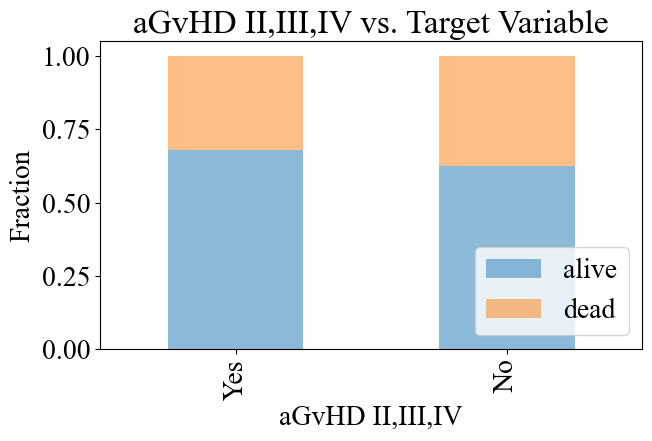

In [41]:
import numpy as np
from matplotlib import pylab as plt

y1 = ['CMVstatus', 'HLAmatch', 'Antigen', 'Alel', 'HLAgrI', 'Recipientageint', 
      'Recipientgender', 'Stemcellsource', 'Donorage35', 'IIIV',
       'Gendermatch', 'DonorABO', 'RecipientABO', 'RecipientRh', 'ABOmatch',
       'DonorCMV', 'RecipientCMV', 'Disease', 'Riskgroup',
       'Txpostrelapse', 'Diseasegroup', 'HLAmismatch', 'Recipientage10',
       'Relapse', 'aGvHDIIIIV', 'extcGvHD']

count_matrix = df.groupby(['IIIV','1_year_survival_status']).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

count_matrix_norm.plot(kind='bar', stacked=True,figsize=(7,4), alpha = 0.5)
plt.ylabel('Fraction')
plt.xlabel('aGvHD II,III,IV')
plt.xticks([0,1], ['Yes', 'No'])
plt.legend(['alive', 'dead'], loc=4)
plt.title('aGvHD II,III,IV vs. Target Variable')
plt.savefig('Figure/aGvHD II,III,IV vs. Target Variable.png',dpi=300)
plt.show()



1_year_survival_status    0   1
extcGvHD                       
0.0                      17  11
1.0                     104  24
1_year_survival_status         0         1
extcGvHD                                  
0.0                     0.607143  0.392857
1.0                     0.812500  0.187500


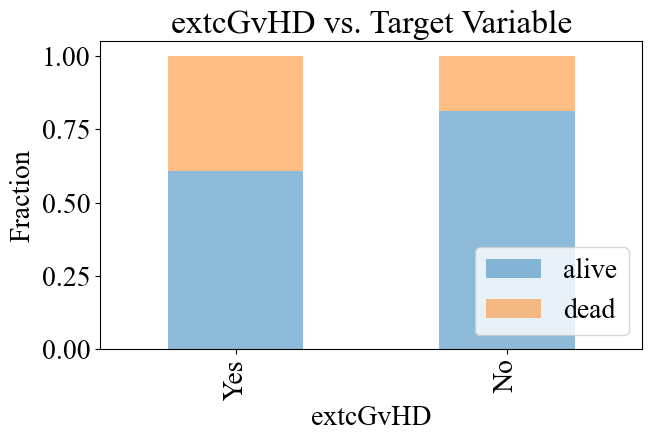

In [43]:
count_matrix = df.groupby(['extcGvHD','1_year_survival_status']).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

count_matrix_norm.plot(kind='bar', stacked=True,figsize=(7,4), alpha = 0.5)
plt.ylabel('Fraction')
plt.xlabel('extcGvHD')
plt.xticks([0,1], ['Yes', 'No'])
plt.legend(['alive', 'dead'], loc=4)
plt.title('extcGvHD vs. Target Variable')
plt.savefig('Figure/extcGvHD vs. Target Variable.png',dpi=300)
plt.show()


1_year_survival_status   0   1
Stemcellsource                
0                       22  20
1                       99  46
1_year_survival_status         0         1
Stemcellsource                            
0                       0.523810  0.476190
1                       0.682759  0.317241


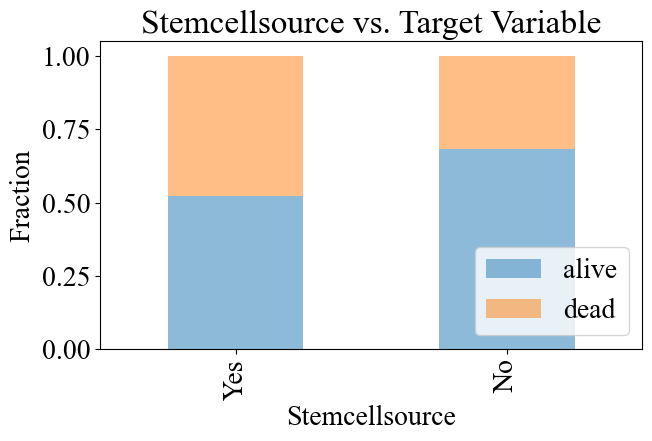

In [46]:
count_matrix = df.groupby(['Stemcellsource','1_year_survival_status']).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

count_matrix_norm.plot(kind='bar', stacked=True,figsize=(7,4), alpha = 0.5)
plt.ylabel('Fraction')
plt.xlabel('Stemcellsource')
plt.xticks([0,1], ['Yes', 'No'])
plt.legend(['alive', 'dead'], loc=4)
plt.title('Stemcellsource vs. Target Variable')
plt.savefig('Figure/Stemcellsource vs. Target Variable.png',dpi=300)
plt.show()


1_year_survival_status    0   1
aGvHDIIIIV                     
0                        20  20
1                       101  46
1_year_survival_status         0         1
aGvHDIIIIV                                
0                       0.500000  0.500000
1                       0.687075  0.312925


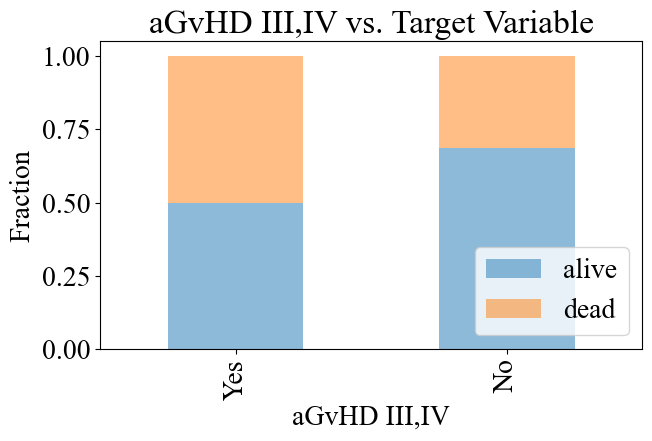

In [45]:
count_matrix = df.groupby(['aGvHDIIIIV','1_year_survival_status']).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

count_matrix_norm.plot(kind='bar', stacked=True,figsize=(7,4), alpha = 0.5)
plt.ylabel('Fraction')
plt.xlabel('aGvHD III,IV')
plt.xticks([0,1], ['Yes', 'No'])
plt.legend(['alive', 'dead'], loc=4)
plt.title('aGvHD III,IV vs. Target Variable')
plt.savefig('Figure/aGvHD III,IV vs. Target Variable.png',dpi=300)
plt.show()


1_year_survival_status   0   1
RecipientCMV                  
0.0                     49  24
1.0                     66  34
1_year_survival_status         0         1
RecipientCMV                              
0.0                     0.671233  0.328767
1.0                     0.660000  0.340000


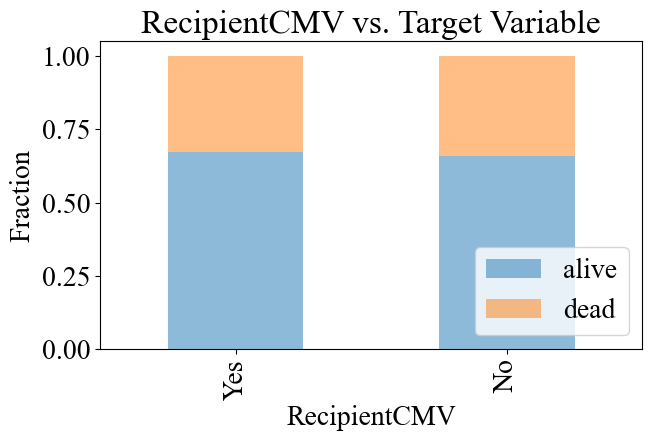

In [48]:
count_matrix = df.groupby(['RecipientCMV','1_year_survival_status']).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

count_matrix_norm.plot(kind='bar', stacked=True,figsize=(7,4), alpha = 0.5)
plt.ylabel('Fraction')
plt.xlabel('RecipientCMV')
plt.xticks([0,1], ['Yes', 'No'])
plt.legend(['alive', 'dead'], loc=4)
plt.title('RecipientCMV vs. Target Variable')
plt.savefig('Figure/RecipientCMV vs. Target Variable.png',dpi=300)
plt.show()


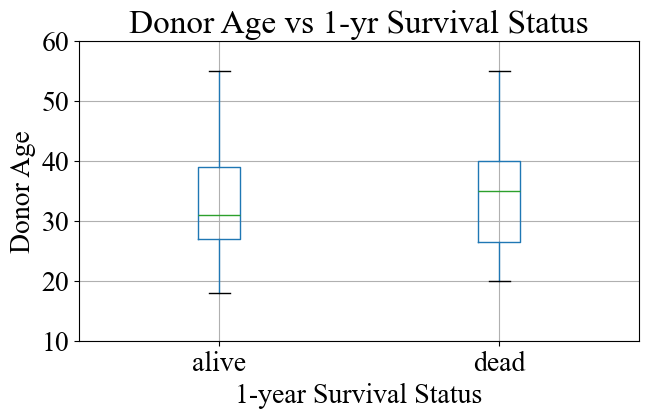

In [49]:
y2 = ['Donorage','Recipientage', 'CD34kgx10d6', 'CD3dCD34', 'CD3dkgx10d8', 
      'Rbodymass', 'ANCrecovery', 'PLTrecovery',
       'time_to_aGvHD_III_IV', 'survival_time']
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['font.size'] =20
df[['Donorage','1_year_survival_status']].boxplot(by='1_year_survival_status', figsize=(7,4))
plt.ylabel('Donor Age')
plt.xlabel('1-year Survival Status')
plt.yticks([10,20,30, 40,50, 60])
plt.xticks([1,2],['alive', 'dead'])
plt.title("Donor Age vs 1-yr Survival Status")
plt.savefig('Figure/Donor Age vs. Target Variable.png',dpi=300)
plt.suptitle('')
plt.show()

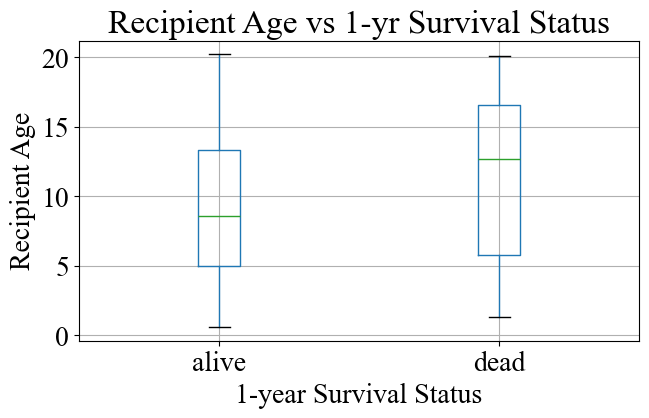

In [51]:
y2 = ['Donorage','Recipientage', 'CD34kgx10d6', 'CD3dCD34', 'CD3dkgx10d8', 
      'Rbodymass', 'ANCrecovery', 'PLTrecovery',
       'time_to_aGvHD_III_IV', 'survival_time']
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['font.size'] =20
df[['Recipientage','1_year_survival_status']].boxplot(by='1_year_survival_status', figsize=(7,4))
plt.ylabel('Recipient Age')
plt.xlabel('1-year Survival Status')
plt.yticks([0,5,10,15,20])
plt.xticks([1,2],['alive', 'dead'])
plt.title("Recipient Age vs 1-yr Survival Status")
plt.savefig('Figure/Recipient Age vs. Target Variable.png',dpi=300)
plt.suptitle('')
plt.show()

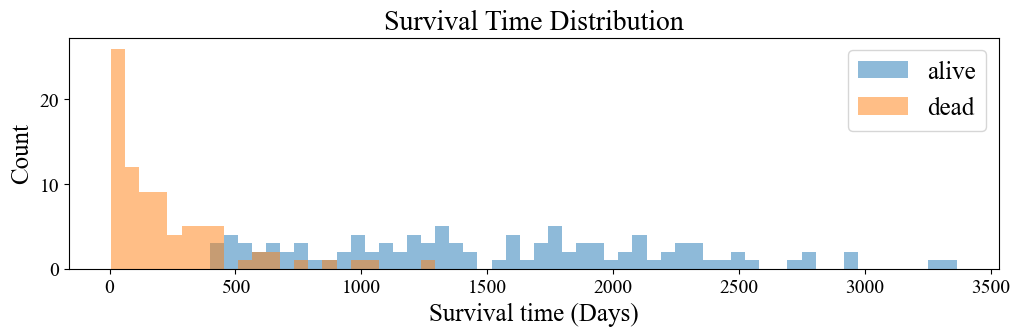

In [52]:
bin_range = (df['survival_time'].min(),df['survival_time'].max())
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.figure(figsize=(12,3))

for c in [0,1]:
    plt.hist(df[df['survival_status']==c]['survival_time'],alpha=0.5,label=c,range=bin_range,bins=60)
plt.legend(['alive', 'dead'], fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xlabel('Survival time (Days)', fontsize=18)
plt.title('Survival Time Distribution',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('Figure/Survival Time (with survival status) Histogram.png',dpi=300)
plt.show()

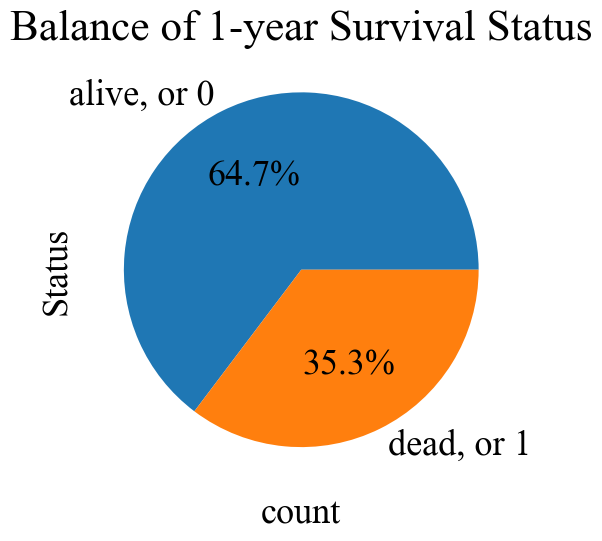

In [53]:
plt.figure(figsize=(10,6))

plt.rcParams['font.size'] =26
plt.rcParams['font.sans-serif'] = 'Times New Roman'
y.value_counts().reindex([0,1]).plot.pie(color = ['cornflowerblue', 'bisque'], labels = ['alive, or 0', 'dead, or 1'], autopct='%1.1f%%')
plt.xlabel('count')
plt.ylabel('Status')
plt.title('Balance of 1-year Survival Status')
plt.tight_layout()
plt.savefig('Figure/Balance of target variable.png',dpi=300)
plt.show()

In [54]:
df['aGvHDIIIIV'].value_counts()

aGvHDIIIIV
1    147
0     40
Name: count, dtype: int64

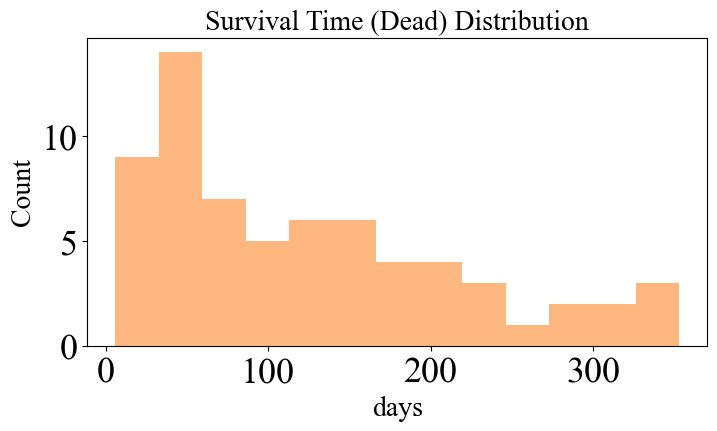

In [55]:
import numpy as np
import matplotlib
from matplotlib import pylab as plt

plt.figure(figsize=(8,4))
dataset = df[y == 1]['survival_time'].values

plt.hist(dataset, bins = int(np.sqrt(df.shape[0])), color="#ffb780")
plt.xlabel('days', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Survival Time (Dead) Distribution', fontsize=20)
plt.savefig('Figure/Survival Time (dead) Histogram.png',dpi=300)
plt.show()

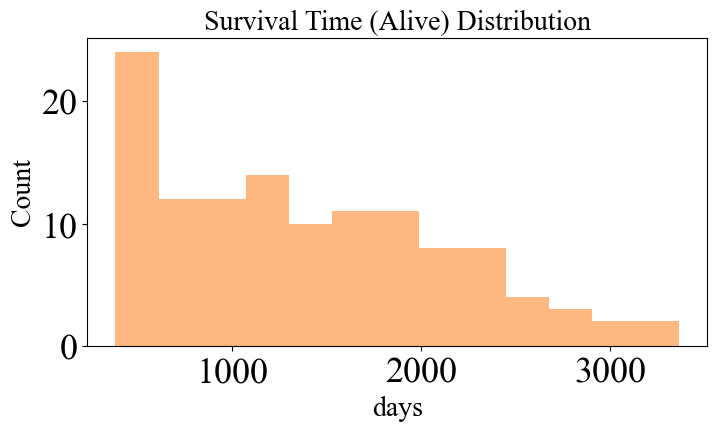

In [56]:
import numpy as np
import matplotlib
from matplotlib import pylab as plt

plt.figure(figsize=(8,4))
dataset = df[y == 0]['survival_time'].values

plt.hist(dataset, bins = int(np.sqrt(df.shape[0])), color="#ffb780")
plt.xlabel('days', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Survival Time (Alive) Distribution', fontsize=20)
plt.savefig('Figure/Survival Time (alive) Histogram.png',dpi=300)
plt.show()

In [57]:
df[y == 1]['survival_time'].quantile(np.arange(0, 1, 0.1))

0.0      6.0
0.1     28.0
0.2     42.0
0.3     56.5
0.4     64.0
0.5    105.0
0.6    136.0
0.7    162.0
0.8    200.0
0.9    267.5
Name: survival_time, dtype: float64

In [21]:
#XGB preprocessing

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline


ordinal_ftrs = ['CMVstatus', 'HLAmatch', 'Antigen', 'Alel', 'HLAgrI', 'Donorage35', 'Recipientage10', 'Recipientageint'] 
# CMVstatus: (the higher the value the lower the compatibility)
ordinal_cats = [[0,1,2,3,10], [0,1,2,3,10], [-1, 0, 1, 2, 10], [-1, 0, 1, 2, 3, 10], 
                [0,1,2,3,4,5,6,7, 10], [0,1], [0,1], [0,1,2]] 

onehot_ftrs = ['Recipientgender', 'Stemcellsource', 'IIIV',
       'Gendermatch', 'DonorABO', 'RecipientABO', 'RecipientRh', 'ABOmatch',
       'DonorCMV', 'RecipientCMV', 'Disease', 'Riskgroup',
       'Txpostrelapse', 'HLAmismatch',
       'Relapse', 'aGvHDIIIIV', 'extcGvHD']

minmax_ftrs = ['Donorage','Recipientage']

std_ftrs = ['CD34kgx10d6', 'CD3dCD34', 'CD3dkgx10d8', 'Rbodymass', 'ANCrecovery', 'PLTrecovery',
       'time_to_aGvHD_III_IV']

categorical_transformer = Pipeline(steps=[    
    ('imputer2', SimpleImputer(strategy='constant', fill_value=-10)),    
    ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore', drop="first"))])
ordinal_transformer = Pipeline(steps=[
    ('imputer3', SimpleImputer(strategy='constant', fill_value=10)),
    ('ordinal', OrdinalEncoder(categories = ordinal_cats))])
# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', categorical_transformer, onehot_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)])
clf = make_pipeline(preprocessor, StandardScaler())


In [22]:
# evaluation matrix
from sklearn.metrics import make_scorer,fbeta_score

def f2_func(y_true, y_pred):
    f2_score = fbeta_score(y_true, y_pred, beta=2)
    return f2_score

def my_f2_scorer():
    return make_scorer(f2_func)

In [360]:
#for i in onehot_ftrs:
    #if len(X_train[i].unique()) <= 1:
     #   print(i)
    #else:
     #   print('nothing')

In [ ]:
#TEST XGB
import xgboost
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

param_grid = {"learning_rate": [0.03],
                #"learning_rate": [0.01, 0.03, 0.1, 0.3],
              "n_estimators": [10000],
              "seed": [0],
              #"reg_alpha": [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2],
              #"reg_lambda": [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2],
              "missing": [np.nan], 
              "max_depth": [1,3,10,30,100],
              "colsample_bytree": [0.9],              
              "subsample": [0.66]}

test_score_all = []

CV_score_all = []

CV_mean_list = []

best_params_list = []
for random_state in range(10):
    X_other, X_test, y_other, y_test = train_test_split(X,y,
                        test_size = 0.2, random_state = random_state*42, stratify=y)
    kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state = random_state*42)
    CV_mean = []
    CV_std = []
    for i in range(len(ParameterGrid(param_grid))):
        XGB = xgboost.XGBClassifier()
        XGB.set_params(**ParameterGrid(param_grid)[i],early_stopping_rounds=50)
        CV_score = []
        for fold_number, (X_train_index, X_CV_index) in enumerate(kfold.split(X_other, y_other)):
            X_train, y_train = X_other.iloc[X_train_index], y_other.iloc[X_train_index]
            X_CV, y_CV = X_other.iloc[X_CV_index], y_other.iloc[X_CV_index]    
            
            #preprocessing
            X_train_prep = clf.fit_transform(X_train)
            X_CV_prep = clf.transform(X_CV)
            X_test_prep = clf.transform(X_test)
            
            #XGB predicting
            XGB.fit(X_train_prep,y_train,eval_set=[(X_CV_prep, y_CV)], verbose=False)
            y_CV_pred = XGB.predict(X_CV_prep)
            i_CV_score = f2_func(y_CV,y_CV_pred)
            CV_score_all.append(i_CV_score)
            CV_score.append(i_CV_score)
        CV_mean.append(np.mean(CV_score))
        CV_std.append(np.std(CV_score))

    best_params_list.append(ParameterGrid(param_grid)[np.argmax(CV_mean)])
    CV_mean_list.append(np.mean(CV_mean))
    XGB.set_params(**ParameterGrid(param_grid)[np.argmax(CV_mean)],early_stopping_rounds=50)
    XGB.fit(X_train_prep,y_train,eval_set=[(X_CV_prep, y_CV)], verbose=False)
    y_test_pred = XGB.predict(X_test_prep)
    test_score = f2_func(y_test,y_test_pred)
    test_score_all.append(test_score)

results_df = pd.DataFrame({
    'random_state': range(10),
    'test_score': test_score_all,
    'best_parameters': best_params_list
})
results_df.to_csv('xgb_results.csv', index=False)


c:\Users\ziyan\anaconda3\envs\data1030\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [5, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\ziyan\anaconda3\envs\data1030\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\ziyan\anaconda3\envs\data1030\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [5, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\ziyan\anaconda3\envs\data1030\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\ziyan\anaconda3\envs\data1030

In [132]:
best_params_list

[{'subsample': 0.66,
  'seed': 0,
  'reg_lambda': 0.01,
  'reg_alpha': 0.01,
  'n_estimators': 10000,
  'missing': nan,
  'max_depth': 3,
  'learning_rate': 0.3,
  'colsample_bytree': 0.9},
 {'subsample': 0.66,
  'seed': 0,
  'reg_lambda': 1.0,
  'reg_alpha': 0.1,
  'n_estimators': 10000,
  'missing': nan,
  'max_depth': 1,
  'learning_rate': 0.1,
  'colsample_bytree': 0.9},
 {'subsample': 0.66,
  'seed': 0,
  'reg_lambda': 0.1,
  'reg_alpha': 0.01,
  'n_estimators': 10000,
  'missing': nan,
  'max_depth': 10,
  'learning_rate': 0.3,
  'colsample_bytree': 0.9},
 {'subsample': 0.66,
  'seed': 0,
  'reg_lambda': 0.1,
  'reg_alpha': 0.1,
  'n_estimators': 10000,
  'missing': nan,
  'max_depth': 3,
  'learning_rate': 0.3,
  'colsample_bytree': 0.9},
 {'subsample': 0.66,
  'seed': 0,
  'reg_lambda': 0.0,
  'reg_alpha': 0.0,
  'n_estimators': 10000,
  'missing': nan,
  'max_depth': 3,
  'learning_rate': 0.3,
  'colsample_bytree': 0.9},
 {'subsample': 0.66,
  'seed': 0,
  'reg_lambda': 0.0,
 

In [134]:
best_params_list[np.argmax(test_score_all)]

{'subsample': 0.66,
 'seed': 0,
 'reg_lambda': 0.1,
 'reg_alpha': 0.01,
 'n_estimators': 10000,
 'missing': nan,
 'max_depth': 10,
 'learning_rate': 0.3,
 'colsample_bytree': 0.9}

In [785]:
#之前的内容
best_params_list[np.argmax(test_score_all)]

{'subsample': 0.66,
 'seed': 0,
 'n_estimators': 10000,
 'missing': nan,
 'max_depth': 10,
 'learning_rate': 0.3,
 'colsample_bytree': 0.9}

In [333]:
np.mean(test_score_all)

0.5211094331325108

In [459]:
best_params_list[np.argmax(test_score_all)]

{'subsample': 0.66,
 'seed': 0,
 'n_estimators': 10000,
 'missing': nan,
 'max_depth': 3,
 'learning_rate': 0.1,
 'colsample_bytree': 0.9}

In [44]:
# second time with more features

param_grid = {"learning_rate": [0.03],
              #"learning_rate": [0.01, 0.03, 0.1, 0.3]
              "n_estimators": [10000],
              "seed": [0],
              "reg_alpha": [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2],
              #"reg_lambda": [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2],
              "missing": [np.nan], 
              "max_depth": [1,3,10,30,100],
              "colsample_bytree": [0.9],              
              "subsample": [0.66]}

test_score_all_2 = []
CV_score_all_2 = []
CV_mean_list_2 = []
best_params_list_2 = []

for random_state in range(10):
    X_other, X_test, y_other, y_test = train_test_split(X,y,
                        test_size = 0.2, random_state = random_state*42, stratify=y)
    kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state = random_state*42)
    CV_mean = []
    CV_std = []
    for i in range(len(ParameterGrid(param_grid))):
        XGB = xgboost.XGBClassifier()
        XGB.set_params(**ParameterGrid(param_grid)[i],early_stopping_rounds=50)
        CV_score = []
        for fold_number, (X_train_index, X_CV_index) in enumerate(kfold.split(X_other, y_other)):
            X_train, y_train = X_other.iloc[X_train_index], y_other.iloc[X_train_index]
            X_CV, y_CV = X_other.iloc[X_CV_index], y_other.iloc[X_CV_index]    
            
            #preprocessing
            X_train_prep = clf.fit_transform(X_train)
            X_CV_prep = clf.transform(X_CV)
            X_test_prep = clf.transform(X_test)
            
            #XGB predicting
            XGB.fit(X_train_prep,y_train,eval_set=[(X_CV_prep, y_CV)], verbose=False)
            y_CV_pred = XGB.predict(X_CV_prep)
            i_CV_score = f2_func(y_CV,y_CV_pred)
            CV_score_all_2.append(i_CV_score)
            CV_score.append(i_CV_score)
        CV_mean.append(np.mean(CV_score))
        CV_std.append(np.std(CV_score))

    best_params_list_2.append(ParameterGrid(param_grid)[np.argmax(CV_mean)])
    CV_mean_list_2.append(np.mean(CV_mean))
    XGB.set_params(**ParameterGrid(param_grid)[np.argmax(CV_mean)],early_stopping_rounds=50)
    XGB.fit(X_train_prep,y_train,eval_set=[(X_CV_prep, y_CV)], verbose=False)
    y_test_pred = XGB.predict(X_test_prep)
    test_score = f2_func(y_test,y_test_pred)
    test_score_all_2.append(test_score)
results2_df = pd.DataFrame({
    'random_state': range(10),
    'test_score': test_score_all_2,
    'best_parameters': best_params_list_2
})
results2_df.to_csv('xgb2_results.csv', index=False)

c:\Users\ziyan\anaconda3\envs\data1030\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [5, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\ziyan\anaconda3\envs\data1030\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\ziyan\anaconda3\envs\data1030\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [5, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\ziyan\anaconda3\envs\data1030\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\ziyan\anaconda3\envs\data1030

In [369]:
test_score_all_2

[0.4838709677419355,
 0.423728813559322,
 0.6557377049180327,
 0.6451612903225806,
 0.7142857142857143,
 0.5833333333333334,
 0.5555555555555556,
 0.4032258064516129,
 0.5737704918032787,
 0.5645161290322581]

In [371]:
print(np.mean(test_score_all))
print(np.std(test_score_all))

0.5211094331325108
0.09815795779133424


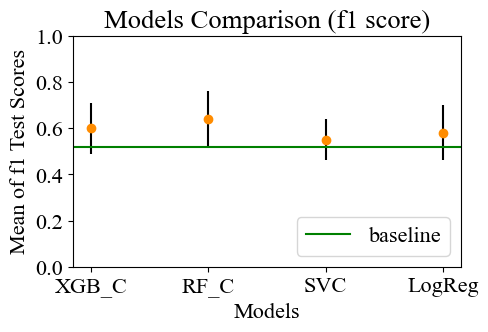

In [63]:
x = [1, 2, 3, 4]
y = [0.60, 0.64, 0.55, 0.58]
yerr = [0.11, 0.12, 0.09, 0.12]
f1 = 0.52

plt.rcParams['font.size'] = 16
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.figure(figsize=(5,3))
plt.errorbar(x, y, yerr=yerr,  color='darkorange', fmt="o", ecolor = "black")
plt.title('Models Comparison (f1 score)')
plt.ylabel('Mean of f1 Test Scores')
plt.xlabel('Models')
plt.xticks([1,2,3,4], ['XGB_C', 'RF_C', 'SVC', 'LogReg'])
plt.ylim(bottom=0, top=1)
plt.axhline(f1,label='baseline', c = 'green')
plt.savefig('Figure/Models Comparison (f1 score).png',dpi=300)
plt.legend(loc=4)
plt.show()

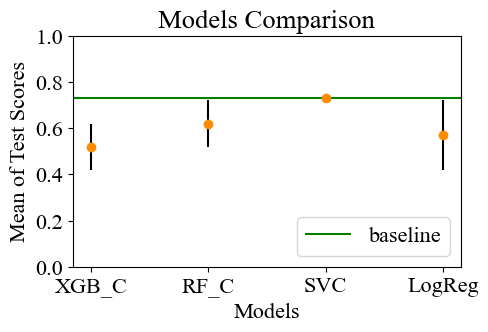

In [64]:
x = [1, 2, 3, 4]
y = [0.52, 0.62, 0.73, 0.57]
yerr = [0.10, 0.10, 0.0, 0.15]
f2 = 0.73

plt.rcParams['font.size'] = 16
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.figure(figsize=(5,3))
plt.errorbar(x, y, yerr=yerr,  color='darkorange', fmt="o", ecolor = "black")
plt.title('Models Comparison')
plt.ylabel('Mean of Test Scores')
plt.xlabel('Models')
plt.xticks([1,2,3,4], ['XGB_C', 'RF_C', 'SVC', 'LogReg'])
plt.ylim(bottom=0, top=1)
plt.axhline(f2,label='baseline', c = 'green')
plt.savefig('Figure/Models Comparison (f2 score).png',dpi=300)
plt.legend(loc=4)
plt.show()

In [28]:
#other models: Random Forest, SVC, logistic regression

from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np 
from sklearn.model_selection import StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline


df_c = df.dropna(subset=['Rbodymass']) #drop the row where Rbodymass is null
X2 = df_c.drop(labels=['survival_status', 'survival_time','1_year_survival_status', 'ANCrecovery', 'PLTrecovery', 'time_to_aGvHD_III_IV'], axis=1)
y2 = df_c['1_year_survival_status']


In [29]:
#X2['ANCrecovery'] = X2['ANCrecovery'].fillna(-100)
#X2['PLTrecovery'] = X2['PLTrecovery'].fillna(-100)
#X2['time_to_aGvHD_III_IV'] = X2['time_to_aGvHD_III_IV'].fillna(-100)
X2['CD3dCD34'] = X2['CD3dCD34'].fillna(-100)
X2['CD3dkgx10d8'] = X2['CD3dkgx10d8'].fillna(-100)

In [30]:
dataset = df_c['ANCrecovery']
sub = np.zeros(X2.shape[0])
for i,val in enumerate(dataset):
    if np.isnan(val):
        sub[i] = 10
X2['ANCrecovery_bool'] = list(sub)

dataset = df_c['PLTrecovery']
sub = np.zeros(X2.shape[0])
for i,val in enumerate(dataset):
    if np.isnan(val):
        sub[i] = 10
X2['PLTrecovery_bool'] = list(sub)

dataset = df_c['time_to_aGvHD_III_IV']
sub = np.zeros(X2.shape[0])
for i,val in enumerate(dataset):
    if np.isnan(val):
        sub[i] = 10
X2['time_to_aGvHD_III_IV_bool'] = list(sub)

In [68]:
X2.columns

Index(['Recipientgender', 'Stemcellsource', 'Donorage', 'Donorage35', 'IIIV',
       'Gendermatch', 'DonorABO', 'RecipientABO', 'RecipientRh', 'ABOmatch',
       'CMVstatus', 'DonorCMV', 'RecipientCMV', 'Disease', 'Riskgroup',
       'Txpostrelapse', 'Diseasegroup', 'HLAmatch', 'HLAmismatch', 'Antigen',
       'Alel', 'HLAgrI', 'Recipientage', 'Recipientage10', 'Recipientageint',
       'Relapse', 'aGvHDIIIIV', 'extcGvHD', 'CD34kgx10d6', 'CD3dCD34',
       'CD3dkgx10d8', 'Rbodymass', 'ANCrecovery_bool', 'PLTrecovery_bool',
       'time_to_aGvHD_III_IV_bool'],
      dtype='object')

In [69]:
df.columns

Index(['Recipientgender', 'Stemcellsource', 'Donorage', 'Donorage35', 'IIIV',
       'Gendermatch', 'DonorABO', 'RecipientABO', 'RecipientRh', 'ABOmatch',
       'CMVstatus', 'DonorCMV', 'RecipientCMV', 'Disease', 'Riskgroup',
       'Txpostrelapse', 'Diseasegroup', 'HLAmatch', 'HLAmismatch', 'Antigen',
       'Alel', 'HLAgrI', 'Recipientage', 'Recipientage10', 'Recipientageint',
       'Relapse', 'aGvHDIIIIV', 'extcGvHD', 'CD34kgx10d6', 'CD3dCD34',
       'CD3dkgx10d8', 'Rbodymass', 'ANCrecovery', 'PLTrecovery',
       'time_to_aGvHD_III_IV', 'survival_time', 'survival_status',
       '1_year_survival_status'],
      dtype='object')

In [581]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [31]:

ordinal_ftrs = ['CMVstatus', 'HLAmatch', 'Antigen', 'Alel', 'HLAgrI', 'IIIV', 'Donorage35', 'Recipientage10', 'Recipientageint', 'ANCrecovery_bool', 'PLTrecovery_bool', 'time_to_aGvHD_III_IV_bool'] 
# CMVstatus: (the higher the value the lower the compatibility)
ordinal_cats = [[0,1,2,3,10], [0,1,2,3,10], [-1, 0, 1, 2, 10], [-1, 0, 1, 2, 3, 10], 
                [0,1,2,3,4,5,6,7, 10], [0, 1], [0,1], [0,1], [0,1,2], [0,10], [0,10], [0,10]] 


#for reduction, deleted 'Diseasegroup', which has correlation of 1.0 with 'Disease'
onehot_ftrs = ['Recipientgender', 'Stemcellsource',
       'Gendermatch', 'DonorABO', 'RecipientABO', 'RecipientRh', 'ABOmatch',
       'DonorCMV', 'RecipientCMV', 'Disease', 'Riskgroup',
       'Txpostrelapse', 'HLAmismatch',
       'Relapse', 'aGvHDIIIIV','extcGvHD']

minmax_ftrs = ['Donorage','Recipientage']

std_ftrs = ['CD34kgx10d6','CD3dCD34','CD3dkgx10d8', 'Rbodymass']
#for reduction, added drop="first"
categorical_transformer = Pipeline(steps=[    
    ('imputer2', SimpleImputer(strategy='constant', fill_value=-10)),    
    ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore', drop="first"))])

ordinal_transformer = Pipeline(steps=[
    ('imputer3', SimpleImputer(strategy='constant', fill_value=10)),
    ('ordinal', OrdinalEncoder(categories = ordinal_cats))])
# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', categorical_transformer, onehot_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)])




In [32]:
q = preprocessor.fit_transform(X2)

pp_feature_names = preprocessor.get_feature_names_out()
pp_feature_names
q.shape

(185, 47)

In [33]:
#Y = pd.DataFrame(list(y2), columns=['1_yr_survival_rate'])
Q = pd.DataFrame(q, columns = pp_feature_names)
Q['1_yr_survival_rate'] = y2

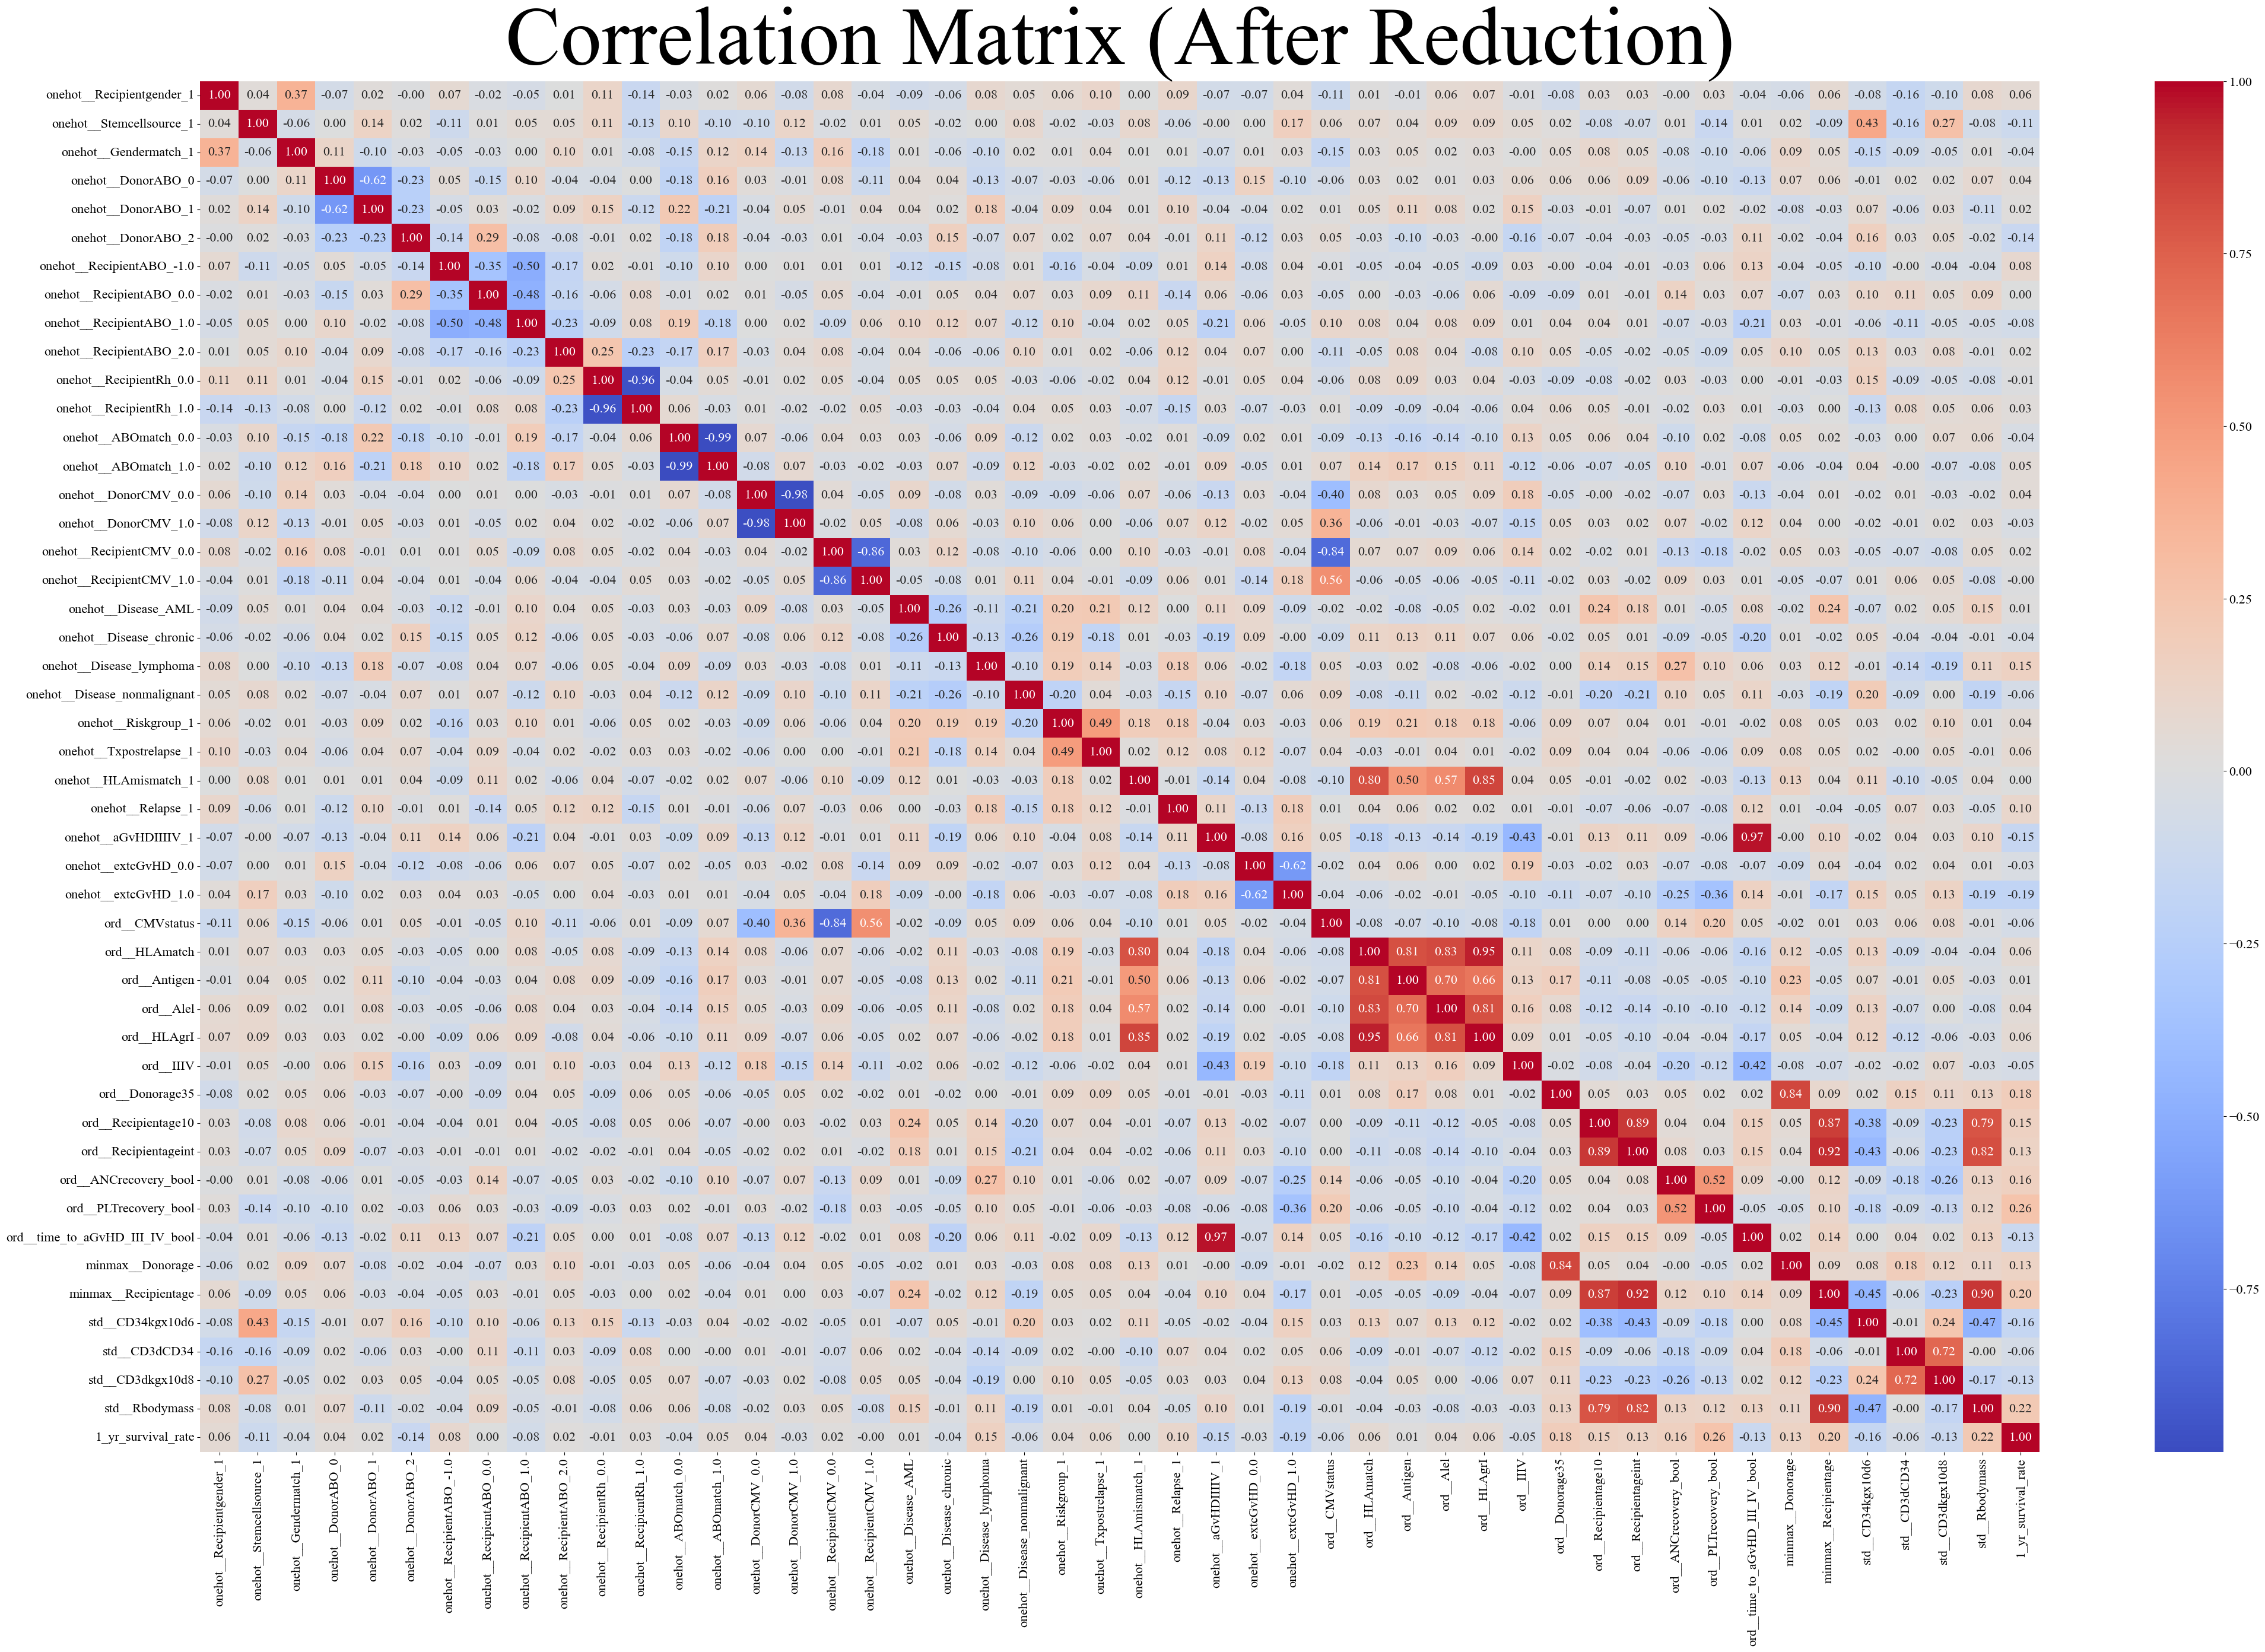

In [87]:
import seaborn as sns
correlation_matrix = Q.corr()

# Plot the correlation matrix
plt.rcParams['font.size'] = 16
plt.figure(figsize=(50,30))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix (After Reduction)", fontsize = 100)
plt.savefig('Figure/Correlation Matrix (After Reduction).png',dpi=300)
plt.show()



In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [39]:
param_grid_SVC = {'svc__C': [0.01, 0.1, 1, 10, 100],
            'svc__gamma': [0.01, 0.1, 1, 10, 100]}
test_score_SVC = []
best_model_SVC = []
for random_state in range(10):
    X_other_2, X_test_2, y_other_2, y_test_2 = train_test_split(X2,y2,
                        test_size = 0.2, random_state = random_state*42, stratify=y2)
    kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state = random_state*42)
    
    clf_SVC = make_pipeline(preprocessor, StandardScaler(), SVC(random_state = random_state, class_weight = 'balanced'))
    grid_SVC = GridSearchCV(clf_SVC, param_grid=param_grid_SVC, cv=kfold, scoring=my_f2_scorer(), return_train_score = True,n_jobs=-1,verbose=True)
    # do kfold CV on _other
    grid_SVC.fit(X_other_2, y_other_2)
    print(grid_SVC.best_score_)
    test_score_SVC.append(grid_SVC.score(X_test_2,y_test_2))
    print(grid_SVC.score(X_test_2,y_test_2))
    best_model_SVC.append(grid_SVC.best_estimator_)
    print(grid_SVC.best_params_)
results_SVC = pd.DataFrame({
    'random_state': range(10),
    'test_score': test_score_SVC,
    'best_model': best_model_SVC
})
results_SVC.to_csv('SVC_results.csv', index=False)

   

Fitting 4 folds for each of 25 candidates, totalling 100 fits
0.7303370786516854
0.7303370786516854
{'svc__C': 0.1, 'svc__gamma': 0.01}
Fitting 4 folds for each of 25 candidates, totalling 100 fits
0.7303370786516854
0.7386363636363636
{'svc__C': 0.1, 'svc__gamma': 0.01}
Fitting 4 folds for each of 25 candidates, totalling 100 fits


c:\Users\ziyan\anaconda3\envs\data1030\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [4, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\ziyan\anaconda3\envs\data1030\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [4, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.7303370786516854
0.7386363636363636
{'svc__C': 0.1, 'svc__gamma': 0.01}
Fitting 4 folds for each of 25 candidates, totalling 100 fits
0.7303370786516854
0.7386363636363636
{'svc__C': 0.1, 'svc__gamma': 0.01}
Fitting 4 folds for each of 25 candidates, totalling 100 fits


c:\Users\ziyan\anaconda3\envs\data1030\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [4, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\ziyan\anaconda3\envs\data1030\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [4, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.7303370786516854
0.7303370786516854
{'svc__C': 0.1, 'svc__gamma': 0.01}
Fitting 4 folds for each of 25 candidates, totalling 100 fits
0.7303370786516854
0.7303370786516854
{'svc__C': 0.1, 'svc__gamma': 0.01}
Fitting 4 folds for each of 25 candidates, totalling 100 fits
0.7303370786516854
0.7386363636363636
{'svc__C': 0.1, 'svc__gamma': 0.01}
Fitting 4 folds for each of 25 candidates, totalling 100 fits
0.7303370786516854
0.7386363636363636
{'svc__C': 0.1, 'svc__gamma': 0.01}
Fitting 4 folds for each of 25 candidates, totalling 100 fits
0.7303370786516854
0.7303370786516854
{'svc__C': 0.1, 'svc__gamma': 0.01}
Fitting 4 folds for each of 25 candidates, totalling 100 fits
0.7303370786516854
0.7303370786516854
{'svc__C': 0.1, 'svc__gamma': 0.01}


In [90]:
test_score_SVC

[0.7303370786516854,
 0.7386363636363636,
 0.7386363636363636,
 0.7386363636363636,
 0.7303370786516854,
 0.7303370786516854,
 0.7386363636363636,
 0.7386363636363636,
 0.7303370786516854,
 0.7303370786516854]

In [91]:
print(np.mean(test_score_SVC))
print(np.std(test_score_SVC))

0.7344867211440246
0.004149642492339123


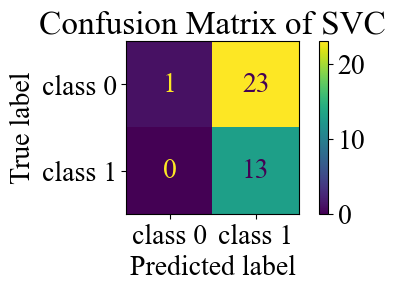

In [102]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# overall accuracy and confusion matrix for males
y_true = y_test_2
y_pred = grid_SVC.predict(X_test_2)
cm = confusion_matrix(y_true,y_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=['class 0', 'class 1'])
fig, ax = plt.subplots(figsize=(5,3))
disp.plot(ax=ax)
plt.tight_layout()
plt.title('Confusion Matrix of SVC')
plt.savefig('Figure/Confusion Matrix SVC.png',dpi=300)
plt.show()

test score =  0.35135135135135137
test baseline =  0.6486486486486487
shuffling Recipientgender
   shuffled test score: 0.351 +/- 0.0
shuffling Stemcellsource
   shuffled test score: 0.351 +/- 0.0
shuffling Donorage
   shuffled test score: 0.351 +/- 0.0
shuffling Donorage35
   shuffled test score: 0.351 +/- 0.0
shuffling IIIV
   shuffled test score: 0.351 +/- 0.0
shuffling Gendermatch
   shuffled test score: 0.351 +/- 0.0
shuffling DonorABO
   shuffled test score: 0.351 +/- 0.0
shuffling RecipientABO
   shuffled test score: 0.351 +/- 0.0
shuffling RecipientRh
   shuffled test score: 0.351 +/- 0.0
shuffling ABOmatch
   shuffled test score: 0.351 +/- 0.0
shuffling CMVstatus
   shuffled test score: 0.351 +/- 0.0
shuffling DonorCMV
   shuffled test score: 0.351 +/- 0.0
shuffling RecipientCMV
   shuffled test score: 0.351 +/- 0.0
shuffling Disease
   shuffled test score: 0.351 +/- 0.0
shuffling Riskgroup
   shuffled test score: 0.351 +/- 0.0
shuffling Txpostrelapse
   shuffled test score: 0

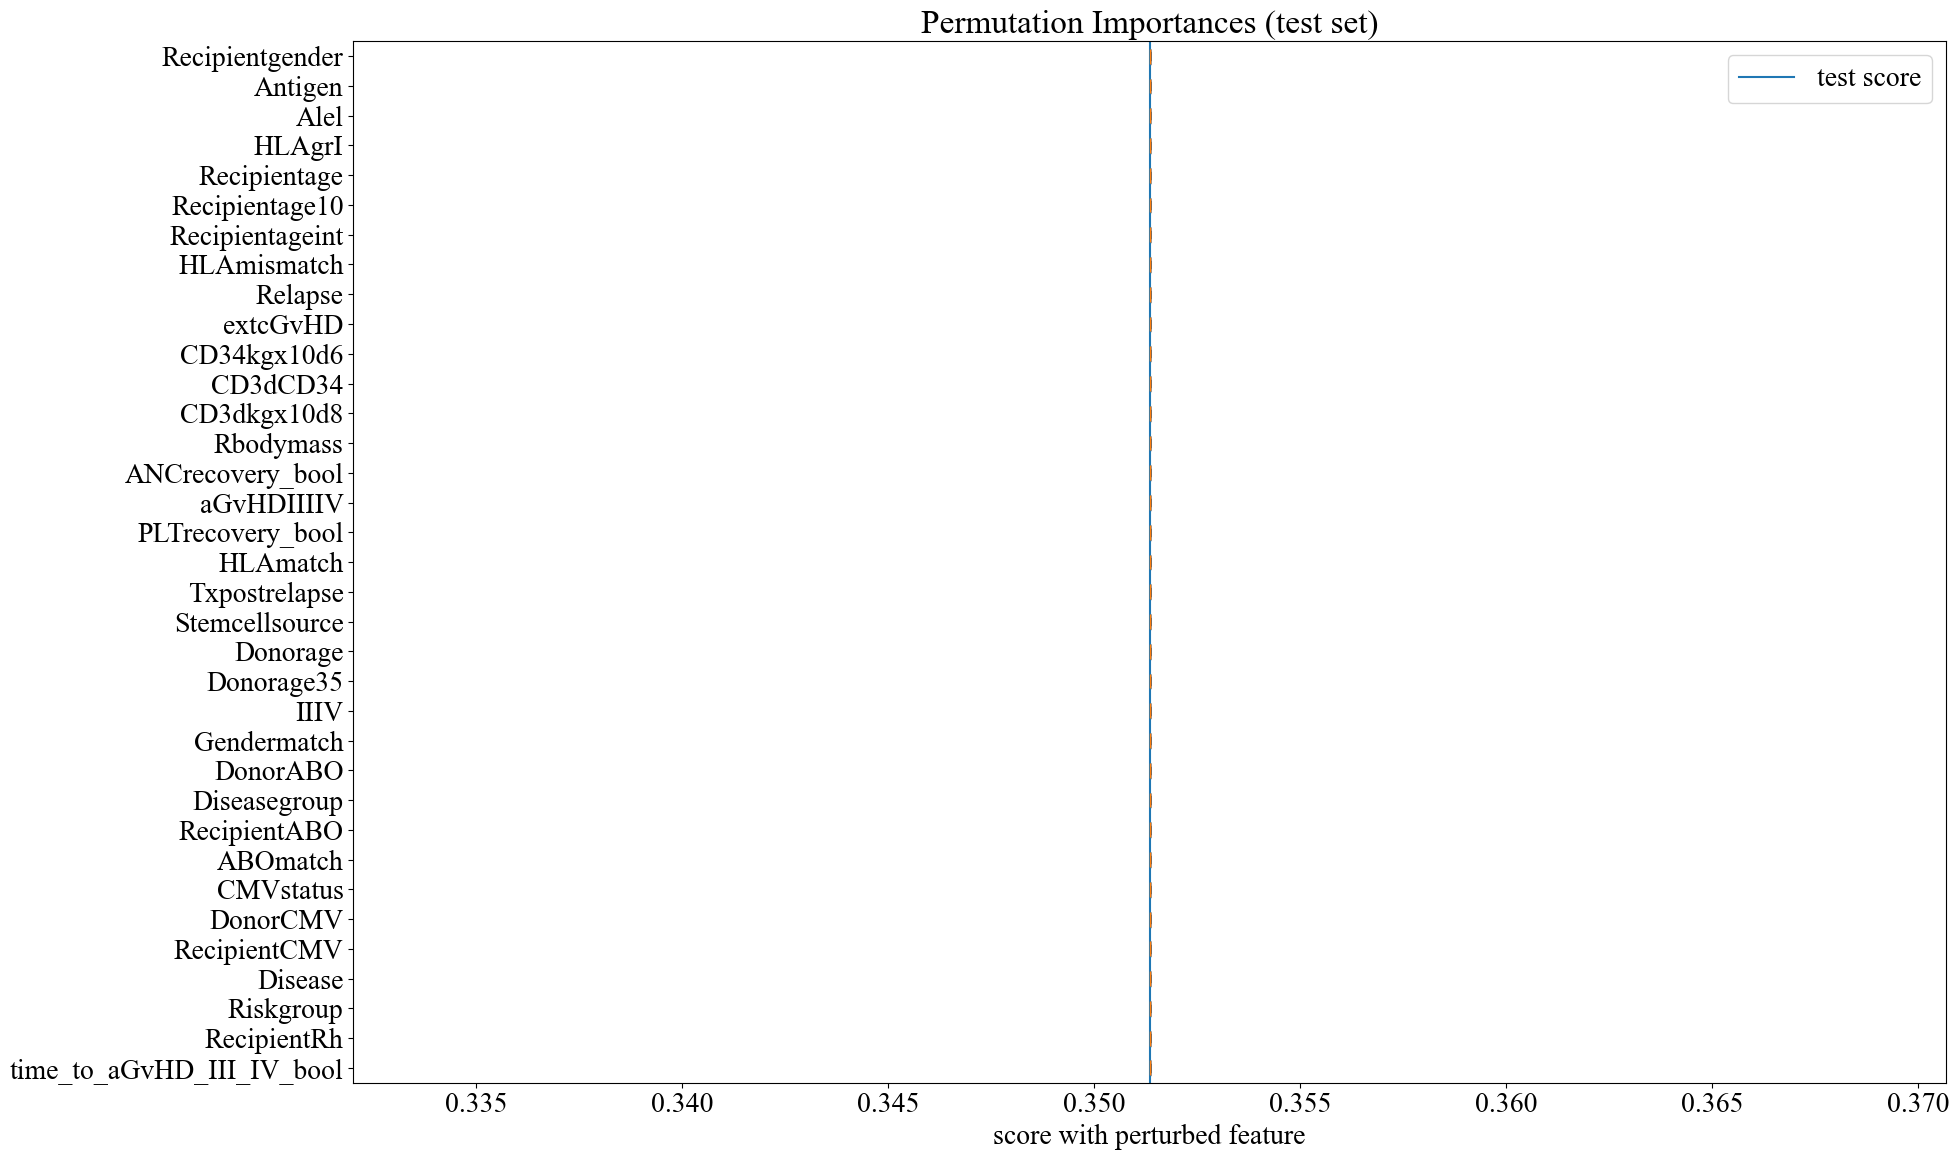

In [94]:
np.random.seed(42)

nr_runs = 10
scores = np.zeros([X2.shape[1],nr_runs])

test_score = best_model_SVC[2].score(X_test_2,y_test_2)
print('test score = ',test_score)
print('test baseline = ',np.sum(y_test_2 == 0)/len(y_test_2))
# loop through the features
for i in range(X2.shape[1]):
    print('shuffling '+str(X2.columns[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test_2.copy()
        X_test_shuffled[X2.columns[i]] = np.random.permutation(X_test_2[X2.columns[i]].values)
        acc_scores.append(best_model_SVC[2].score(X_test_shuffled,y_test_2))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

ftr_names = X2.columns
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(20,12))
plt.boxplot(scores[sorted_indcs].T,tick_labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.savefig('Figure/Permutation Importances of SVC.png',dpi=300)
plt.show()

In [40]:
from sklearn.metrics import f1_score
param_grid_RF = {'randomforestclassifier__max_depth': [1, 3, 10, 30, 100], # no upper bound so the values are evenly spaced in log
                'randomforestclassifier__max_features': [0.25, 0.5,0.75,1.0] # linearly spaced because it is between 0 and 1, 0 is omitted
                } 
test_score_RF = []
best_model_RF = []
all_grid_RF = []
for random_state in range(10):
    X_other_2, X_test_2, y_other_2, y_test_2 = train_test_split(X2,y2,
                        test_size = 0.2, random_state = random_state*43, stratify=y2)
    kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state = random_state*44)
    
    clf_RF = make_pipeline(preprocessor, StandardScaler(), RandomForestClassifier(random_state = random_state*13))
    grid_RF = GridSearchCV(clf_RF, param_grid=param_grid_RF, cv=kfold, scoring=my_f2_scorer(), return_train_score = True,n_jobs=-1,verbose=True)
    # do kfold CV on _other
    grid_RF.fit(X_other_2, y_other_2)
    #print(grid_RF.best_score_)
    test_score_RF.append(grid_RF.score(X_test_2,y_test_2))
    #print(grid_RF.score(X_test_2,y_test_2))
    best_model_RF.append(grid_RF.best_estimator_)
    #print(grid_RF.best_params_)
    all_grid_RF.append(grid_RF)
    y_pred = grid_RF.predict(X_test_2)
    #print(y_pred)
    #print(f1_score(y_test_2, y_pred))

results_RF = pd.DataFrame({
    'random_state': range(10),
    'test_score': test_score_RF,
    'best_model': all_grid_RF
})
results_RF.to_csv('RF_results.csv', index=False)


Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits


c:\Users\ziyan\anaconda3\envs\data1030\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [4, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\ziyan\anaconda3\envs\data1030\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [4, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits


In [96]:
test_score_RF

[0.7575757575757576,
 0.625,
 0.4166666666666667,
 0.625,
 0.6060606060606061,
 0.5833333333333334,
 0.5737704918032787,
 0.7936507936507936,
 0.546875,
 0.6923076923076923]

In [97]:
print(np.mean(test_score_RF))
print(np.std(test_score_RF))

0.6220240341398129
0.10231654366639051


In [98]:
best_model_RF

[Pipeline(steps=[('columntransformer',
                  ColumnTransformer(transformers=[('onehot',
                                                   Pipeline(steps=[('imputer2',
                                                                    SimpleImputer(fill_value=-10,
                                                                                  strategy='constant')),
                                                                   ('onehot',
                                                                    OneHotEncoder(drop='first',
                                                                                  handle_unknown='ignore',
                                                                                  sparse_output=False))]),
                                                   ['Recipientgender',
                                                    'Stemcellsource',
                                                    'Gendermatch', 'DonorABO',
         

Fitting 4 folds for each of 20 candidates, totalling 80 fits


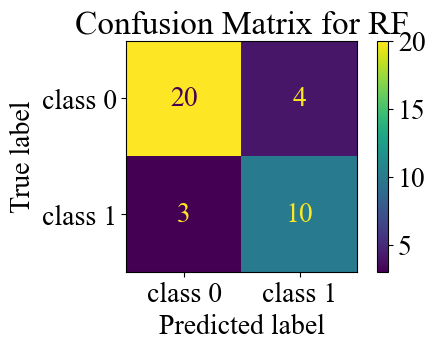

the number is  0
0.7575757575757576
Fitting 4 folds for each of 20 candidates, totalling 80 fits


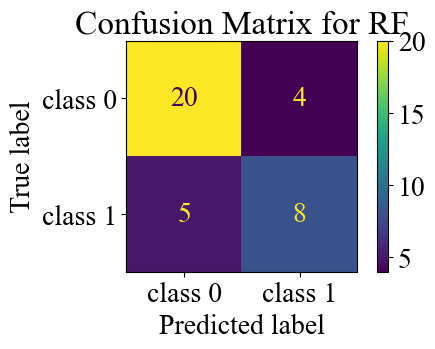

the number is  1
0.625
Fitting 4 folds for each of 20 candidates, totalling 80 fits


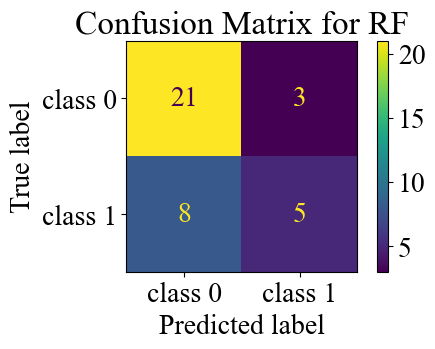

the number is  2
0.4166666666666667
Fitting 4 folds for each of 20 candidates, totalling 80 fits


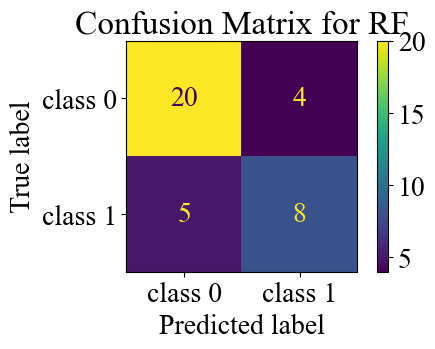

the number is  3
0.625
Fitting 4 folds for each of 20 candidates, totalling 80 fits


c:\Users\ziyan\anaconda3\envs\data1030\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [4, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


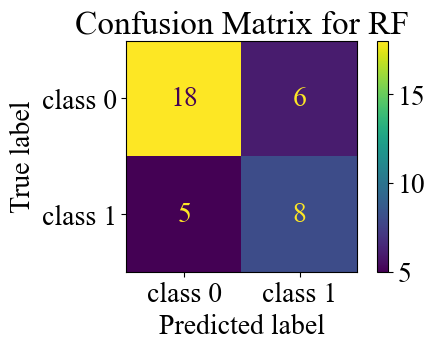

c:\Users\ziyan\anaconda3\envs\data1030\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [4, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


the number is  4
0.6060606060606061
Fitting 4 folds for each of 20 candidates, totalling 80 fits


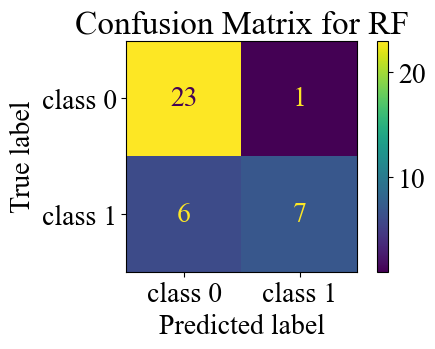

the number is  5
0.5833333333333334
Fitting 4 folds for each of 20 candidates, totalling 80 fits


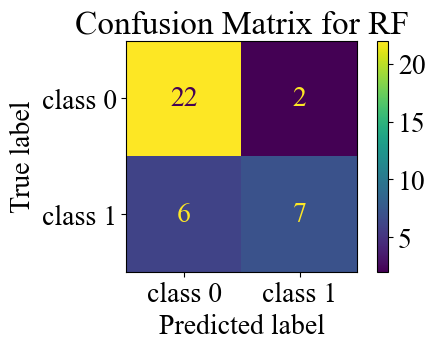

the number is  6
0.5737704918032787
Fitting 4 folds for each of 20 candidates, totalling 80 fits


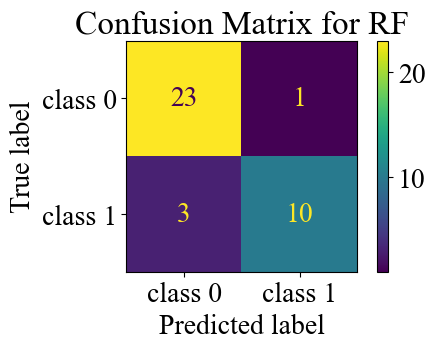

the number is  7
0.7936507936507936
Fitting 4 folds for each of 20 candidates, totalling 80 fits


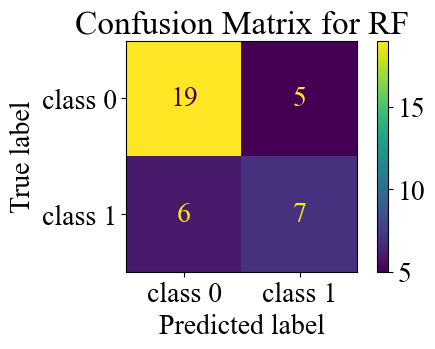

the number is  8
0.546875
Fitting 4 folds for each of 20 candidates, totalling 80 fits


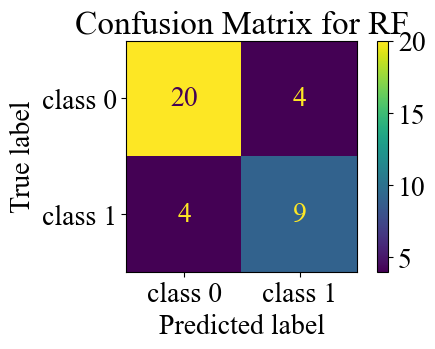

the number is  9
0.6923076923076923


In [508]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
plt.rcParams.update({'font.size': 20})
for i in range(10):
    X_other_2, X_test_2, y_other_2, y_test_2 = train_test_split(X2,y2,
                        test_size = 0.2, random_state = i*43, stratify=y2)
    all_grid_RF[i].fit(X_other_2, y_other_2)
    y_pred_2 = all_grid_RF[i].predict(X_test_2)
    cm = confusion_matrix(y_test_2,y_pred_2)
    disp = ConfusionMatrixDisplay(cm,display_labels=['class 0', 'class 1'])
    
    fig, ax = plt.subplots(figsize=(5,3))
    disp.plot(ax=ax)
    plt.title('Confusion Matrix for RF')
    plt.show()
    print('the number is ', i)
    print(all_grid_RF[i].score(X_test_2, y_test_2))

Fitting 4 folds for each of 20 candidates, totalling 80 fits


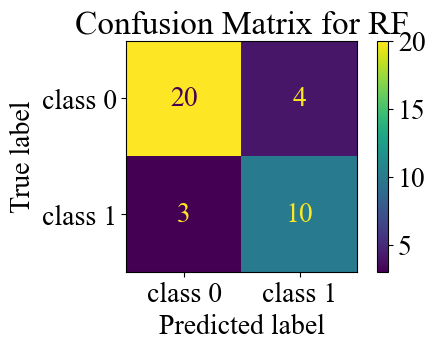

the random number is  0
0.7575757575757576


In [103]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
plt.rcParams.update({'font.size': 20})
for i in range(1):
    X_other_2, X_test_2, y_other_2, y_test_2 = train_test_split(X2,y2,
                        test_size = 0.2, random_state = i*43, stratify=y2)
    all_grid_RF[i].fit(X_other_2, y_other_2)
    y_pred_2 = all_grid_RF[i].predict(X_test_2)
    cm = confusion_matrix(y_test_2,y_pred_2)
    disp = ConfusionMatrixDisplay(cm,display_labels=['class 0', 'class 1'])
    
    fig, ax = plt.subplots(figsize=(5,3))
    disp.plot(ax=ax)
    plt.title('Confusion Matrix for RF')
    plt.savefig('Figure/Confusion Matrix RF.png',dpi=300)
    plt.show()
    print('the random number is ', i)
    print(all_grid_RF[i].score(X_test_2, y_test_2))

In [104]:
RF_importance =all_grid_RF[0].best_estimator_[-1].feature_importances_
feature_imp_df = pd.DataFrame({'Feature': pp_feature_names, 'Gini_Importance': RF_importance}).sort_values('Gini_Importance', ascending = 0)
feature_imp_df

Feature  Gini_Importance
28            onehot__extcGvHD_1.0         0.237047
41                minmax__Donorage         0.095857
27            onehot__extcGvHD_0.0         0.069904
44                   std__CD3dCD34         0.065909
39           ord__PLTrecovery_bool         0.062216
46                  std__Rbodymass         0.059116
42            minmax__Recipientage         0.044428
43                std__CD34kgx10d6         0.043400
25               onehot__Relapse_1         0.040133
45                std__CD3dkgx10d8         0.035695
23         onehot__Txpostrelapse_1         0.024180
33                     ord__HLAgrI         0.020465
31                    ord__Antigen         0.020100
29                  ord__CMVstatus         0.017907
0        onehot__Recipientgender_1         0.012067
30                   ord__HLAmatch         0.009435
32                       ord__Alel         0.009022
4               onehot__DonorABO_1         0.008965
22             onehot__Riskgroup_1         0.008285
17        onehot__RecipientCMV_1.0         0.007913
35                 ord__Donorage35         0.005821
10         onehot__RecipientRh_0.0         0.005804
13            onehot__ABOmatch_1.0         0.005713
3               onehot__DonorABO_0         0.005607
19         onehot__Disease_chronic         0.005592
12            onehot__ABOmatch_0.0         0.005487
20        onehot__Disease_lymphoma         0.005353
34                       ord__IIIV         0.005176
16        onehot__RecipientCMV_0.0         0.005043
7         onehot__RecipientABO_0.0         0.005038
11         onehot__RecipientRh_1.0         0.004974
26            onehot__aGvHDIIIIV_1         0.004724
18             onehot__Disease_AML         0.004520
9         onehot__RecipientABO_2.0         0.004255
6        onehot__RecipientABO_-1.0         0.004131
2            onehot__Gendermatch_1         0.003982
21    onehot__Disease_nonmalignant         0.003916
14            onehot__DonorCMV_0.0         0.003334
40  ord__time_to_aGvHD_III_IV_bool         0.003221
15            onehot__DonorCMV_1.0         0.003078
1         onehot__Stemcellsource_1         0.003024
8         onehot__RecipientABO_1.0         0.002722
24           onehot__HLAmismatch_1         0.002660
37            ord__Recipientageint         0.002451
5               onehot__DonorABO_2         0.001237
36             ord__Recipientage10         0.001095
38           ord__ANCrecovery_bool         0.000000

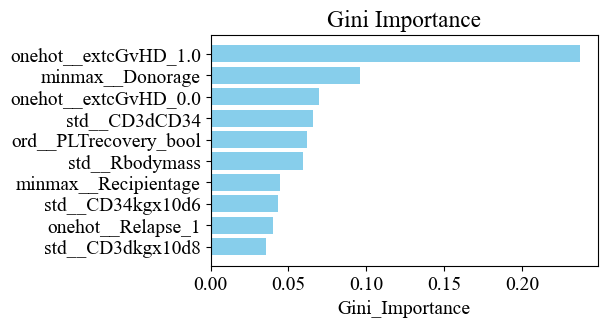

In [105]:
plt.figure(figsize=(5,3))
plt.rcParams.update({'font.size': 14})
plt.barh(feature_imp_df['Feature'][:10], feature_imp_df['Gini_Importance'][:10], color = 'skyblue')
plt.xlabel('Gini_Importance')
plt.title('Gini Importance')
plt.gca().invert_yaxis()
plt.savefig('Figure/Gini Importance RF.png',dpi=300)
plt.show()

Fitting 4 folds for each of 20 candidates, totalling 80 fits
test score =  0.7575757575757576
test baseline =  0.73


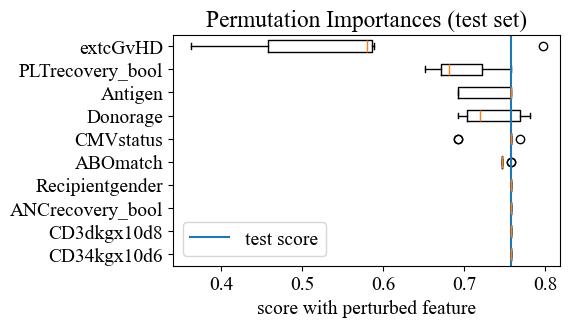

In [106]:
import matplotlib.pyplot as plt

np.random.seed(42)

nr_runs = 10
scores = np.zeros([X2.shape[1],nr_runs])
i = 0
X_other_2, X_test_2, y_other_2, y_test_2 = train_test_split(X2,y2,
                        test_size = 0.2, random_state = i*43, stratify=y2)
all_grid_RF[i].fit(X_other_2, y_other_2)
test_score = all_grid_RF[i].score(X_test_2,y_test_2)
print('test score = ',test_score)
print('test baseline = ',0.73)
# loop through the features
for i in range(X2.shape[1]):
    #print('shuffling '+str(X2.columns[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test_2.copy()
        X_test_shuffled[X2.columns[i]] = np.random.permutation(X_test_2[X2.columns[i]].values)
        acc_scores.append(all_grid_RF[0].score(X_test_shuffled,y_test_2))
    #print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

ftr_names = X2.columns
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(5,3))
plt.boxplot(scores[sorted_indcs][-10:].T,tick_labels=ftr_names[sorted_indcs][-10:],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.savefig('Figure/Permutation Importances RF.png',dpi=300)
plt.show()

In [107]:
import shap
shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model
explainer = shap.TreeExplainer(all_grid_RF[7].best_estimator_[-1])
# transform the test set
X_test_transformed = all_grid_RF[7].best_estimator_[0].transform(X_test_2)
print(np.shape(X_test_transformed))
# calculate shap values on the first 1000 points in the test
shap_values = explainer.shap_values(X_test_transformed[:1000])
print(np.shape(shap_values))

(37, 47)
(37, 47, 2)


In [115]:
index = 27 # the index of the point to explain
print(explainer.expected_value[1]) # we explain class 0 predictions! Change indices to 1 if you want to explain class 1 predictions!
plt.rcParams['font.size'] =16
#matplotlib= True
shap.force_plot(explainer.expected_value[1], shap_values[index,:,1], features = X_test_transformed[index,:],feature_names = pp_feature_names)

0.35202702702702715


0.6479729729729728


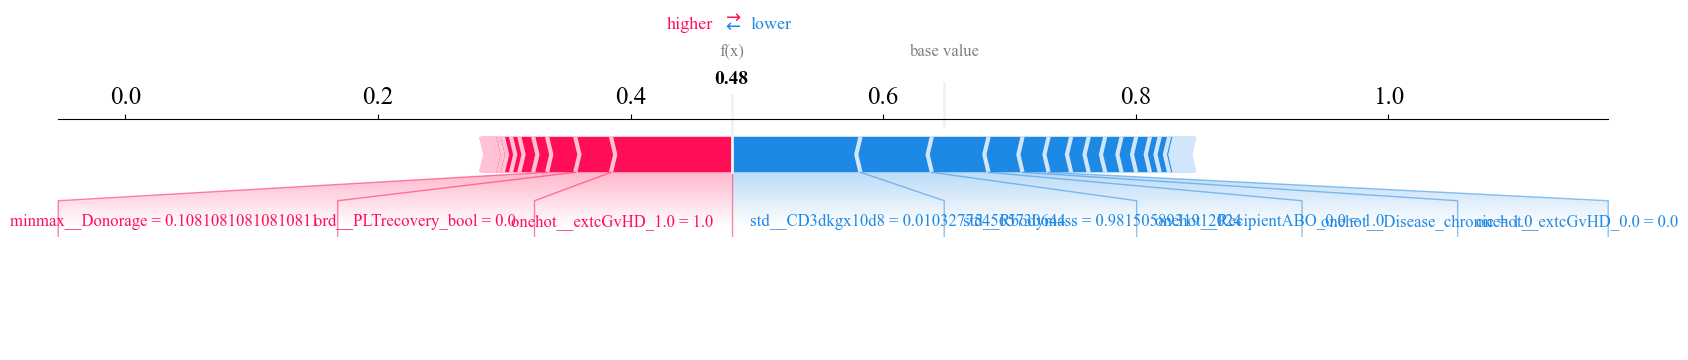

In [114]:
import matplotlib.pyplot as plt
index = 25 # the index of the point to explain
print(explainer.expected_value[0]) # we explain class 0 predictions! Change indices to 1 if you want to explain class 1 predictions!
plt.rcParams.update({'font.size': 18})

shap.force_plot(explainer.expected_value[0], shap_values[index,:,0], features = X_test_transformed[index,:],feature_names = pp_feature_names, matplotlib= True)


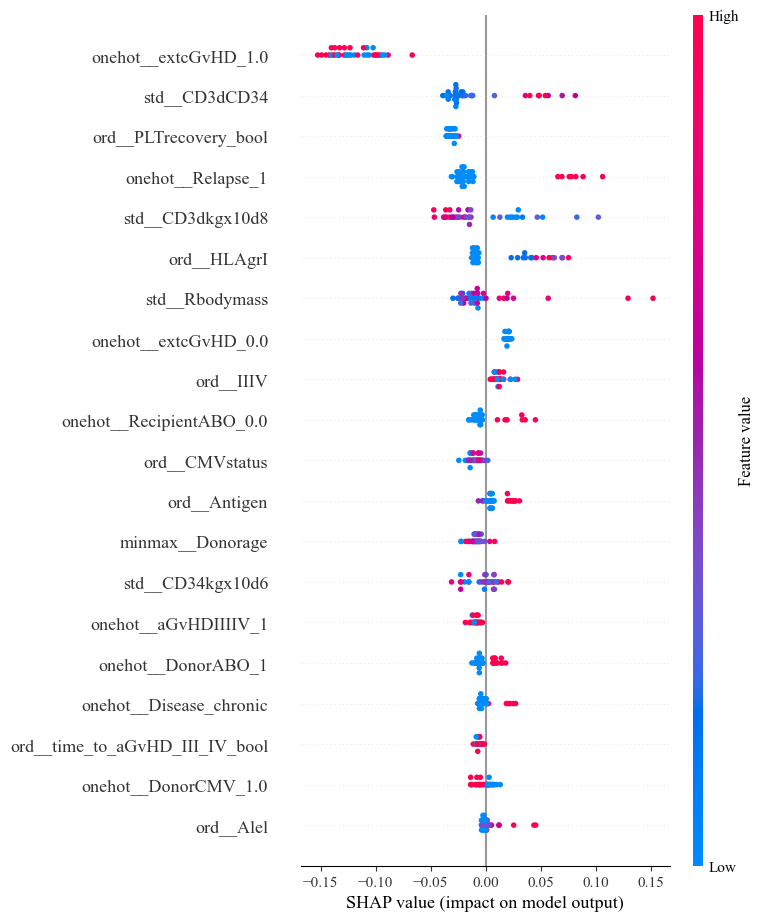

In [119]:
shap.summary_plot(shap_values[:,:,1], X_test_transformed[:1000],feature_names = pp_feature_names)


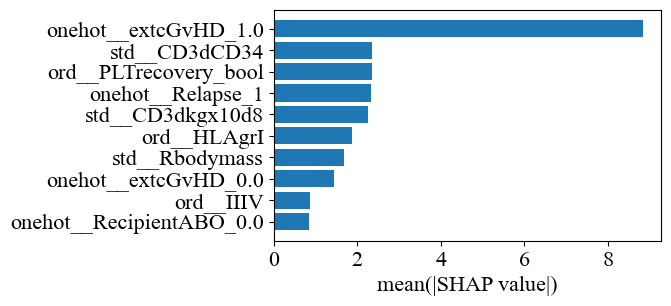

In [120]:
shap_summary = np.sum(np.abs(shap_values[:,:,1]),axis=0)+np.sum(np.abs(shap_values[:,:,0]),axis=0) # same shape as the number of features
indcs = np.argsort(shap_summary)
shap_summary[indcs]

plt.figure(figsize=(5,3))
plt.barh(pp_feature_names[indcs[-10:]],shap_summary[indcs[-10:]])
plt.xlabel('mean(|SHAP value|)')
plt.savefig('Figure/SHAP values.png', dpi =300)
plt.show()

In [41]:
#LogisticRegression
from sklearn.metrics import make_scorer,fbeta_score

def f2_func(y_true, y_pred):
    f2_score = fbeta_score(y_true, y_pred, beta=2)
    return f2_score

def my_f2_scorer():
    return make_scorer(f2_func)

param_grid_LR = {'logisticregression__C': [0.01, 0.1, 1, 10,100],
              'logisticregression__l1_ratio': [0, 0.2,0.4,0.6,0.8, 1]}
test_score_LR = []
best_model_LR = []
all_grid_LR = []
for random_state in range(10):
    X_other_2, X_test_2, y_other_2, y_test_2 = train_test_split(X2,y2,
                        test_size = 0.2, random_state = random_state*42, stratify=y2)
    kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state = random_state*42)
    
    clf_LR = make_pipeline(preprocessor, StandardScaler(), LogisticRegression(penalty='elasticnet',solver='saga',max_iter=10000000, random_state = random_state))
    grid_LR = GridSearchCV(clf_LR, param_grid=param_grid_LR, cv=kfold, scoring=my_f2_scorer(), return_train_score = True,n_jobs=-1,verbose=True)
    # do kfold CV on X_other
    grid_LR.fit(X_other_2, y_other_2)
    print(grid_LR.best_score_)
    test_score_LR.append(grid_LR.score(X_test_2,y_test_2))
    print(grid_LR.score(X_test_2,y_test_2))
    best_model_LR.append(grid_LR.best_estimator_)
    print(grid_LR.best_params_)
    all_grid_LR.append(grid_LR)
results_LR = pd.DataFrame({
    'random_state': range(10),
    'test_score': test_score_LR,
    'best_model': all_grid_LR
})
results_LR.to_csv('LR_results.csv', index=False)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
0.563152349442672
0.7575757575757576
{'logisticregression__C': 0.1, 'logisticregression__l1_ratio': 0.8}
Fitting 4 folds for each of 30 candidates, totalling 120 fits
0.6849704468042477
0.25
{'logisticregression__C': 1, 'logisticregression__l1_ratio': 1}
Fitting 4 folds for each of 30 candidates, totalling 120 fits


c:\Users\ziyan\anaconda3\envs\data1030\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [4, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\ziyan\anaconda3\envs\data1030\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [4, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.5803405844203537
0.7352941176470589
{'logisticregression__C': 1, 'logisticregression__l1_ratio': 0.8}
Fitting 4 folds for each of 30 candidates, totalling 120 fits
0.5882476868846923
0.703125
{'logisticregression__C': 100, 'logisticregression__l1_ratio': 1}
Fitting 4 folds for each of 30 candidates, totalling 120 fits


c:\Users\ziyan\anaconda3\envs\data1030\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [4, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\ziyan\anaconda3\envs\data1030\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [4, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.6515051125548115
0.44776119402985076
{'logisticregression__C': 10, 'logisticregression__l1_ratio': 1}
Fitting 4 folds for each of 30 candidates, totalling 120 fits
0.6023771606342623
0.625
{'logisticregression__C': 100, 'logisticregression__l1_ratio': 0}
Fitting 4 folds for each of 30 candidates, totalling 120 fits
0.5917921216428679
0.4411764705882353
{'logisticregression__C': 100, 'logisticregression__l1_ratio': 0.2}
Fitting 4 folds for each of 30 candidates, totalling 120 fits
0.6547619047619048
0.6818181818181818
{'logisticregression__C': 0.1, 'logisticregression__l1_ratio': 0.8}
Fitting 4 folds for each of 30 candidates, totalling 120 fits
0.6706532115333695
0.5
{'logisticregression__C': 100, 'logisticregression__l1_ratio': 1}
Fitting 4 folds for each of 30 candidates, totalling 120 fits
0.6146349019644893
0.546875
{'logisticregression__C': 10, 'logisticregression__l1_ratio': 0.8}


In [532]:
print(np.mean(test_score_LR))
print(np.std(test_score_LR))

0.5688625721659084
0.1533352657376303


In [329]:
N1 = []
N0 = []
for random_state in range(10):
    X_other_2, X_test_2, y_other_2, y_test_2 = train_test_split(X2,y2,
                        test_size = 0.2, random_state = random_state*42,stratify=y2)
    n0, n1 = y_test_2.value_counts()[0], y_test_2.value_counts()[1]
    N0.append(n0)
    N1.append(n1)

print(N0, N1)

[24, 24, 24, 24, 24, 24, 24, 24, 24, 24] [13, 13, 13, 13, 13, 13, 13, 13, 13, 13]


Fitting 4 folds for each of 30 candidates, totalling 120 fits


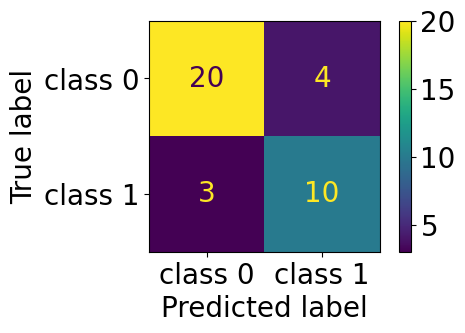

the number is  0
0.7936507936507936
Fitting 4 folds for each of 30 candidates, totalling 120 fits


c:\Users\ziyan\anaconda3\envs\data1030\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [4, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


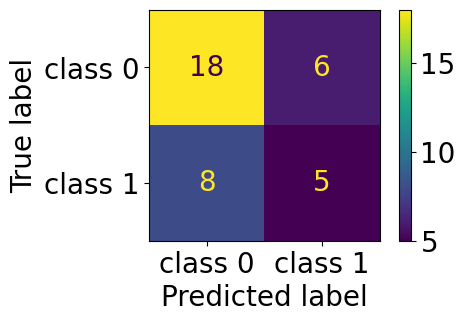

c:\Users\ziyan\anaconda3\envs\data1030\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [4, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


the number is  1
0.3333333333333333
Fitting 4 folds for each of 30 candidates, totalling 120 fits


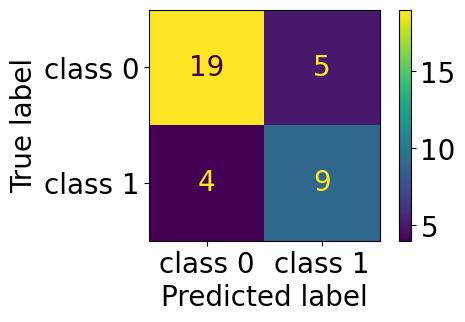

the number is  2
0.7352941176470589
Fitting 4 folds for each of 30 candidates, totalling 120 fits


c:\Users\ziyan\anaconda3\envs\data1030\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [4, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


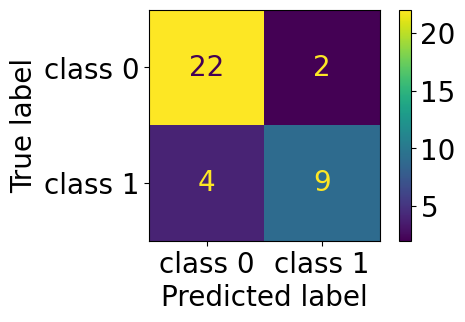

c:\Users\ziyan\anaconda3\envs\data1030\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [4, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


the number is  3
0.703125
Fitting 4 folds for each of 30 candidates, totalling 120 fits


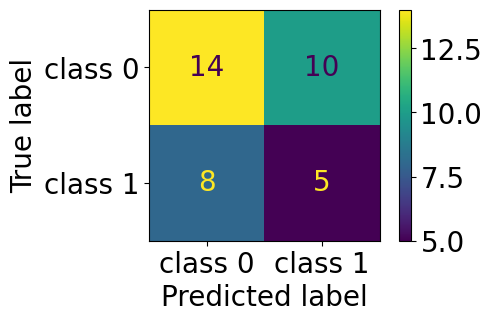

the number is  4
0.47619047619047616
Fitting 4 folds for each of 30 candidates, totalling 120 fits


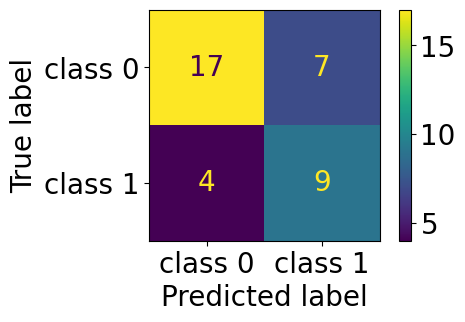

the number is  5
0.4166666666666667
Fitting 4 folds for each of 30 candidates, totalling 120 fits


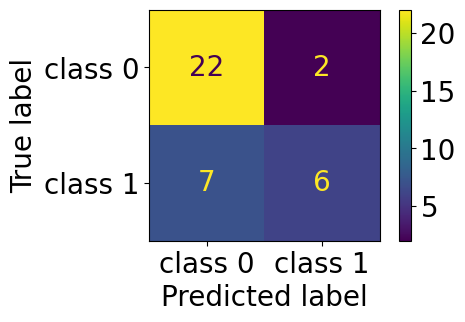

the number is  6
0.4918032786885246
Fitting 4 folds for each of 30 candidates, totalling 120 fits


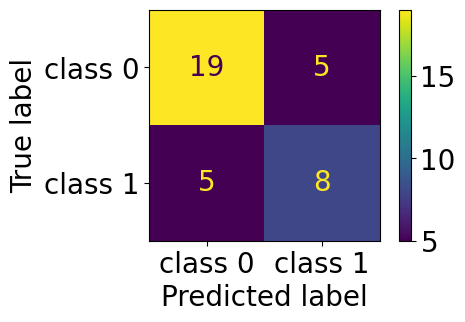

the number is  7
0.6451612903225806
Fitting 4 folds for each of 30 candidates, totalling 120 fits


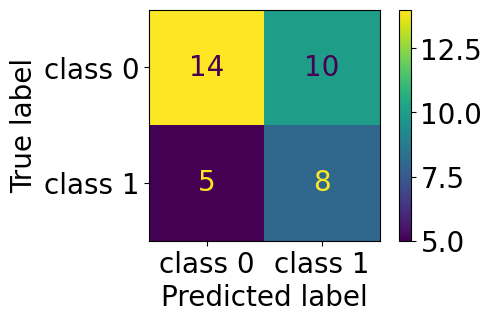

the number is  8
0.5737704918032787
Fitting 4 folds for each of 30 candidates, totalling 120 fits


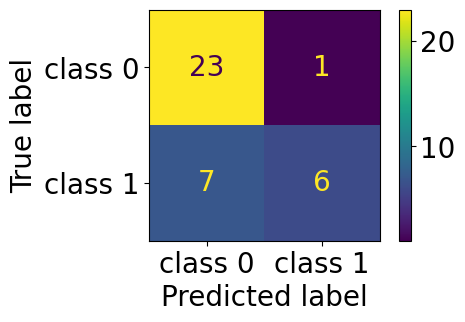

the number is  9
0.625


In [330]:
plt.rcParams.update({'font.size': 20})
for i in range(10):
    X_other_2, X_test_2, y_other_2, y_test_2 = train_test_split(X2,y2,
                        test_size = 0.2, random_state = i*42, stratify=y2)
    all_grid_LR[i].fit(X_other_2, y_other_2)
    y_pred_2 = all_grid_LR[i].predict(X_test_2)
    cm = confusion_matrix(y_test_2,y_pred_2)
    disp = ConfusionMatrixDisplay(cm,display_labels=['class 0', 'class 1'])
    fig, ax = plt.subplots(figsize=(5,3))
    disp.plot(ax=ax)
    plt.show()
    print('the number is ', i)
    print(all_grid_RF[i].score(X_test_2, y_test_2))

test score =  0.7567567567567568
test baseline =  0.73
shuffling Recipientgender
   shuffled test score: 0.757 +/- 0.0
shuffling Stemcellsource
   shuffled test score: 0.757 +/- 0.0
shuffling Donorage
   shuffled test score: 0.757 +/- 0.0
shuffling Donorage35
   shuffled test score: 0.757 +/- 0.0
shuffling IIIV
   shuffled test score: 0.757 +/- 0.0
shuffling Gendermatch
   shuffled test score: 0.757 +/- 0.0
shuffling DonorABO
   shuffled test score: 0.757 +/- 0.0
shuffling RecipientABO
   shuffled test score: 0.757 +/- 0.0
shuffling RecipientRh
   shuffled test score: 0.757 +/- 0.0
shuffling ABOmatch
   shuffled test score: 0.757 +/- 0.0
shuffling CMVstatus
   shuffled test score: 0.757 +/- 0.0
shuffling DonorCMV
   shuffled test score: 0.757 +/- 0.0
shuffling RecipientCMV
   shuffled test score: 0.757 +/- 0.0
shuffling Disease
   shuffled test score: 0.757 +/- 0.0
shuffling Riskgroup
   shuffled test score: 0.757 +/- 0.0
shuffling Txpostrelapse
   shuffled test score: 0.757 +/- 0.0
sh

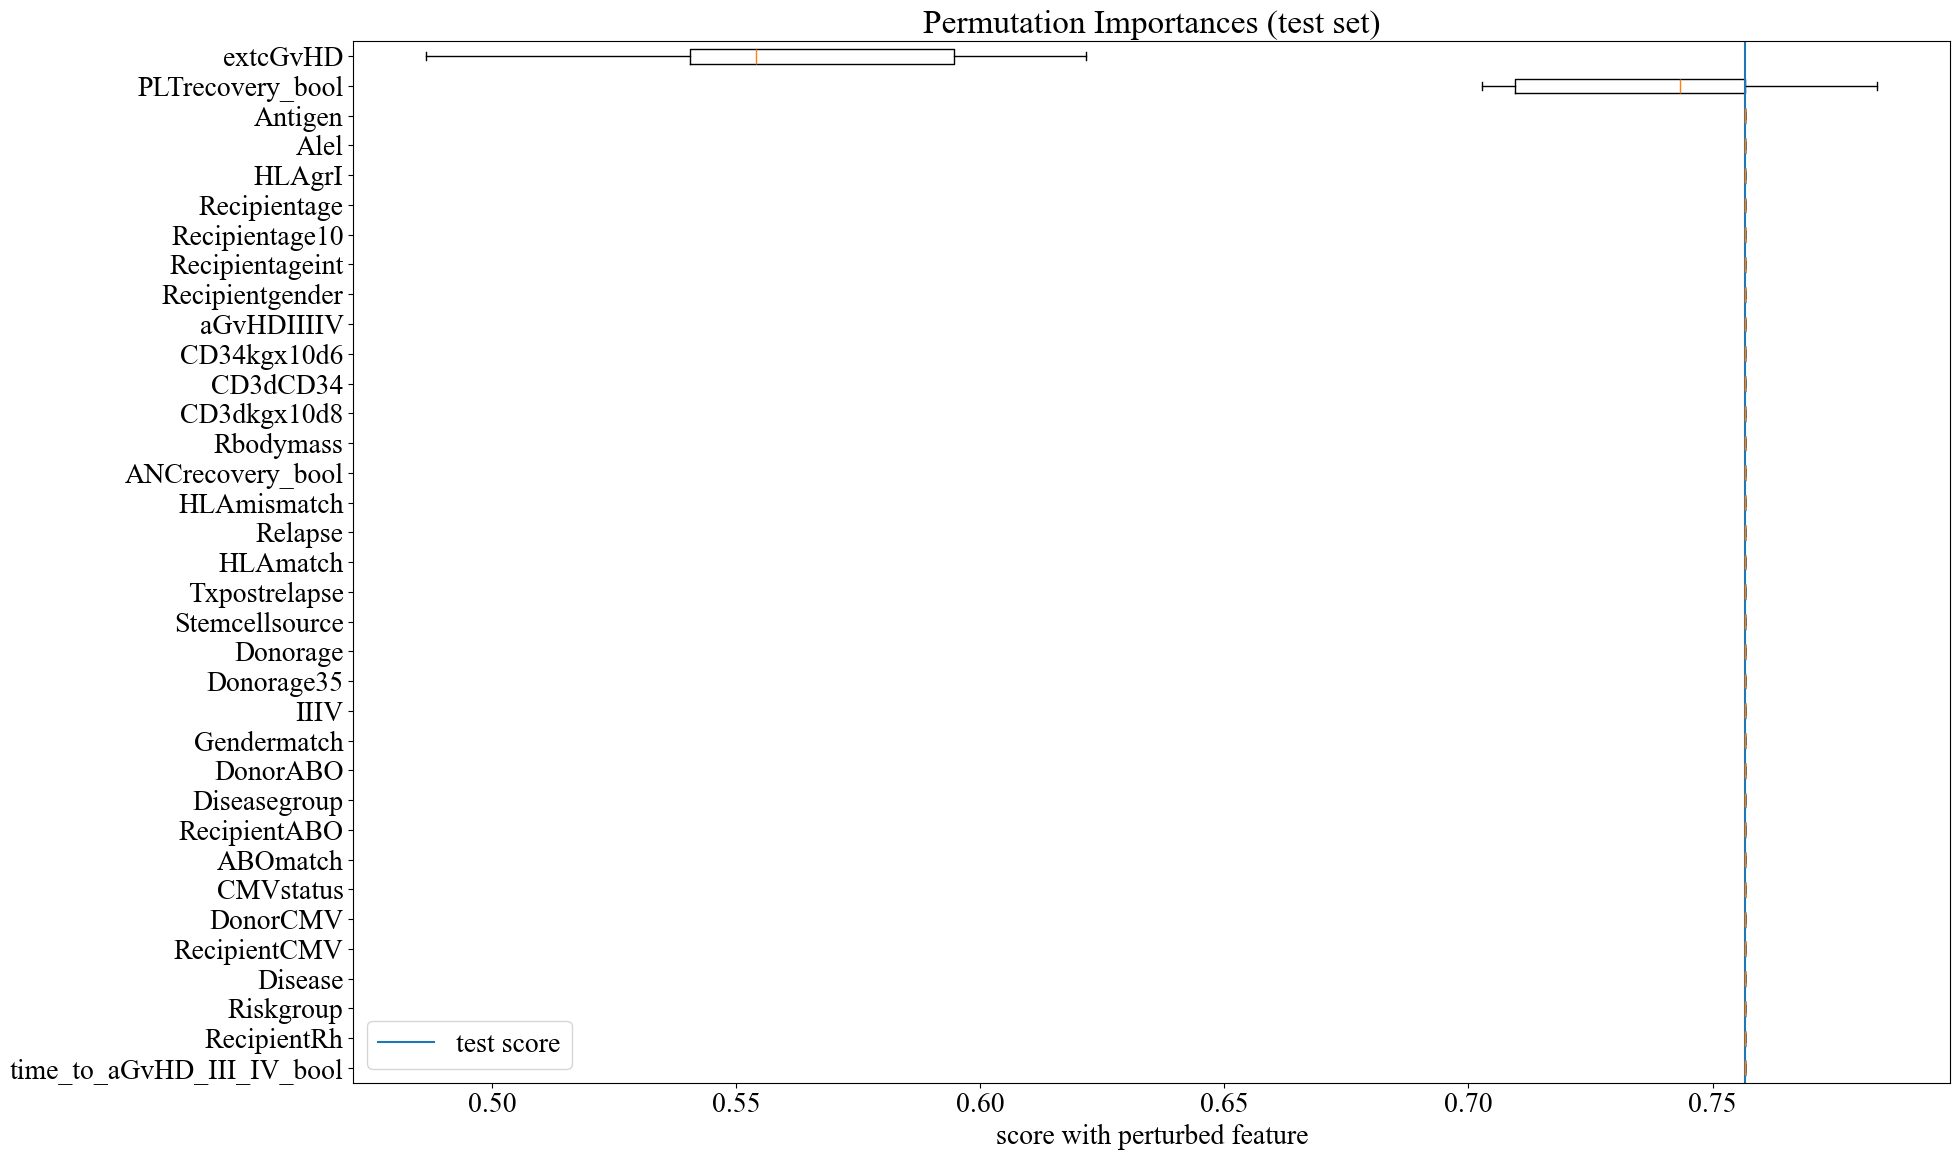

In [126]:
np.random.seed(42)

nr_runs = 10
scores = np.zeros([X2.shape[1],nr_runs])

test_score = best_model_LR[0].score(X_test_2,y_test_2)
print('test score = ',test_score)
print('test baseline = ',0.73)
# loop through the features
for i in range(X2.shape[1]):
    print('shuffling '+str(X2.columns[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test_2.copy()
        X_test_shuffled[X2.columns[i]] = np.random.permutation(X_test_2[X2.columns[i]].values)
        acc_scores.append(best_model_LR[0].score(X_test_shuffled,y_test_2))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

ftr_names = X2.columns
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(20,12))
plt.boxplot(scores[sorted_indcs].T,tick_labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.savefig('Figure/Permutation Importances Logistic Reg.png', dpi =300)
plt.show()

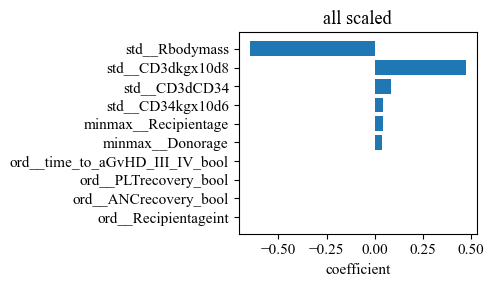

In [132]:
feature_names = list(all_grid_LR[0].best_estimator_[0].named_transformers_['onehot'][0].get_feature_names_out(onehot_ftrs)) + list(grid_LR.best_estimator_[0].named_transformers_['ord'][0].get_feature_names_out(ordinal_ftrs)) + minmax_ftrs + std_ftrs
 

coefs = all_grid_LR[0].best_estimator_[-1].coef_[0]
sorted_indcs = np.argsort(np.abs(coefs))

plt.figure(figsize=(5,3))
plt.rcParams.update({'font.size': 11})
plt.barh(pp_feature_names[-10:],coefs[sorted_indcs[-10:]])
#plt.yticks(np.arange(10),feature_names[sorted_indcs[-10:]])
plt.xlabel('coefficient')
plt.title('all scaled')
plt.tight_layout()
plt.savefig('Figure/Logistic Reg_coefs_scaled.png',dpi=300)
plt.show()

In [133]:
#KN
from sklearn.neighbors import KNeighborsClassifier
param_grid_KN = {'kneighborsclassifier__n_neighbors': [1,3,10,30],
              'kneighborsclassifier__weights': ['uniform','distance']}
test_score_KN = []
best_model_KN = []
all_grid_KN = []
for random_state in range(10):
    X_other_2, X_test_2, y_other_2, y_test_2 = train_test_split(X2,y2,
                        test_size = 0.2, random_state = random_state*42, stratify=y2)
    kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state = random_state*42)
    
    clf_KN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())
    grid_KN = GridSearchCV(clf_KN, param_grid=param_grid_KN, cv=kfold, scoring=my_f2_scorer(), return_train_score = True,n_jobs=-1,verbose=True)
    # do kfold CV on X_other
    grid_KN.fit(X_other_2, y_other_2)
    print(grid_KN.best_score_)
    test_score_KN.append(grid_KN.score(X_test_2,y_test_2))
    print(grid_KN.score(X_test_2,y_test_2))
    best_model_KN.append(grid_KN.best_estimator_)
    print(grid_KN.best_params_)
    all_grid_KN.append(grid_LR)

Fitting 4 folds for each of 8 candidates, totalling 32 fits
0.3480973657557207
0.390625
{'kneighborsclassifier__n_neighbors': 1, 'kneighborsclassifier__weights': 'uniform'}
Fitting 4 folds for each of 8 candidates, totalling 32 fits
0.4498722016569716
0.15384615384615385
{'kneighborsclassifier__n_neighbors': 1, 'kneighborsclassifier__weights': 'uniform'}
Fitting 4 folds for each of 8 candidates, totalling 32 fits


c:\Users\ziyan\anaconda3\envs\data1030\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [4, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\ziyan\anaconda3\envs\data1030\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [4, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.3639354431924501
0.625
{'kneighborsclassifier__n_neighbors': 1, 'kneighborsclassifier__weights': 'uniform'}
Fitting 4 folds for each of 8 candidates, totalling 32 fits
0.3998425260437697
0.423728813559322
{'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__weights': 'uniform'}
Fitting 4 folds for each of 8 candidates, totalling 32 fits


c:\Users\ziyan\anaconda3\envs\data1030\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [4, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\ziyan\anaconda3\envs\data1030\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [4, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.42911010558069385
0.3333333333333333
{'kneighborsclassifier__n_neighbors': 1, 'kneighborsclassifier__weights': 'uniform'}
Fitting 4 folds for each of 8 candidates, totalling 32 fits
0.29393642387142627
0.3333333333333333
{'kneighborsclassifier__n_neighbors': 1, 'kneighborsclassifier__weights': 'uniform'}
Fitting 4 folds for each of 8 candidates, totalling 32 fits
0.4083494980565372
0.2459016393442623
{'kneighborsclassifier__n_neighbors': 1, 'kneighborsclassifier__weights': 'uniform'}
Fitting 4 folds for each of 8 candidates, totalling 32 fits
0.39852796480614106
0.45454545454545453
{'kneighborsclassifier__n_neighbors': 1, 'kneighborsclassifier__weights': 'uniform'}
Fitting 4 folds for each of 8 candidates, totalling 32 fits
0.3823635057471264
0.5147058823529411
{'kneighborsclassifier__n_neighbors': 1, 'kneighborsclassifier__weights': 'uniform'}
Fitting 4 folds for each of 8 candidates, totalling 32 fits
0.4718501984126984
0.3225806451612903
{'kneighborsclassifier__n_neighbors': 1, 'k